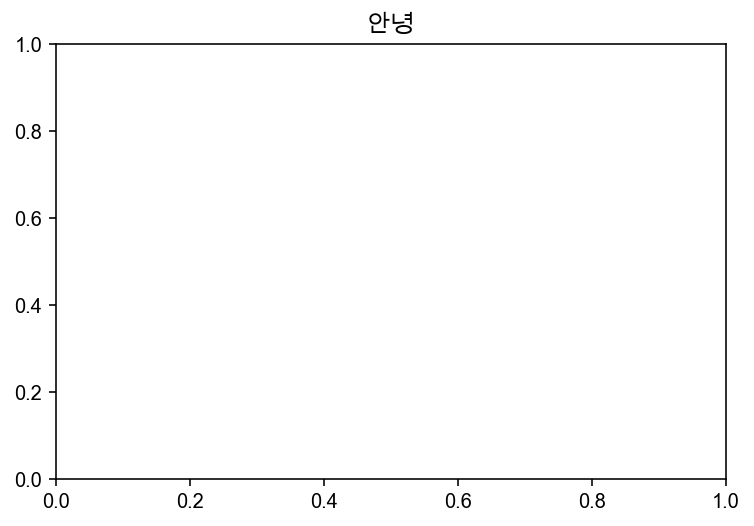

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('안녕');  # 세미콜론은 plt.show()와 같은 역할을 한다

In [38]:
# 폰트 이름 확인
from matplotlib import font_manager

f_path = "/Library/Fonts/Arial Unicode.ttf"
font_manager.FontProperties(fname=f_path).get_name()

'Arial Unicode MS'

In [65]:
# 위에서 확인한 폰트 이름으로 폰트 설정
# 항상 이 두 줄의 코드가 먼저 실행되어야 함!!
from matplotlib import rc
rc('font', family='Arial Unicode MS')

## 서울시 운동 데이터 읽기

In [97]:
import pandas as pd

raw_data = pd.read_csv('./data/report.txt', sep='\t')
raw_data.tail()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
48,2017,관악구,관악구,50.7,7.1,6.9,33.6,1.7
49,2017,서초구,서초구,59.8,3.4,3.2,32.0,1.5
50,2017,강남구,강남구,59.1,5.5,2.6,31.5,1.3
51,2017,송파구,송파구,42.6,7.2,5.8,44.3,0.1
52,2017,강동구,강동구,53.1,9.6,6.8,30.4,0.1


In [101]:
raw_data["함께 운동을 할 사람이 없어서"][raw_data["함께 운동을 할 사람이 없어서"]=="-"] = 0
raw_data["함께 운동을 할 사람이 없어서"] = raw_data["함께 운동을 할 사람이 없어서"].astype("float")

/Users/jaecheolchoi/opt/anaconda3/envs/dss/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
raw_data["기타"][raw_data["기타"]=="-"] = 0
raw_data["기타"] = raw_data["기타"].astype("float")

/Users/jaecheolchoi/opt/anaconda3/envs/dss/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   대분류                53 non-null     object 
 1   분류                 53 non-null     object 
 2   운동을 할 충분한 시간이 없어서  53 non-null     float64
 3   함께 운동을 할 사람이 없어서   53 non-null     float64
 4   운동을 할 만한 장소가 없어서   53 non-null     float64
 5   운동을 싫어해서           53 non-null     float64
 6   기타                 53 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


In [122]:
raw_data = raw_data[raw_data["대분류"] == "성별"]

In [105]:
raw_data.drop(["기간"], axis="columns" ,inplace=True)
### axis = 1도 같다
raw_data.head()

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1


In [124]:
from matplotlib import rc
rc('font', family='Arial Unicode MS')

In [131]:
raw_data.set_index("분류", inplace=True)
raw_data.head()

KeyError: "None of ['분류'] are in the columns"

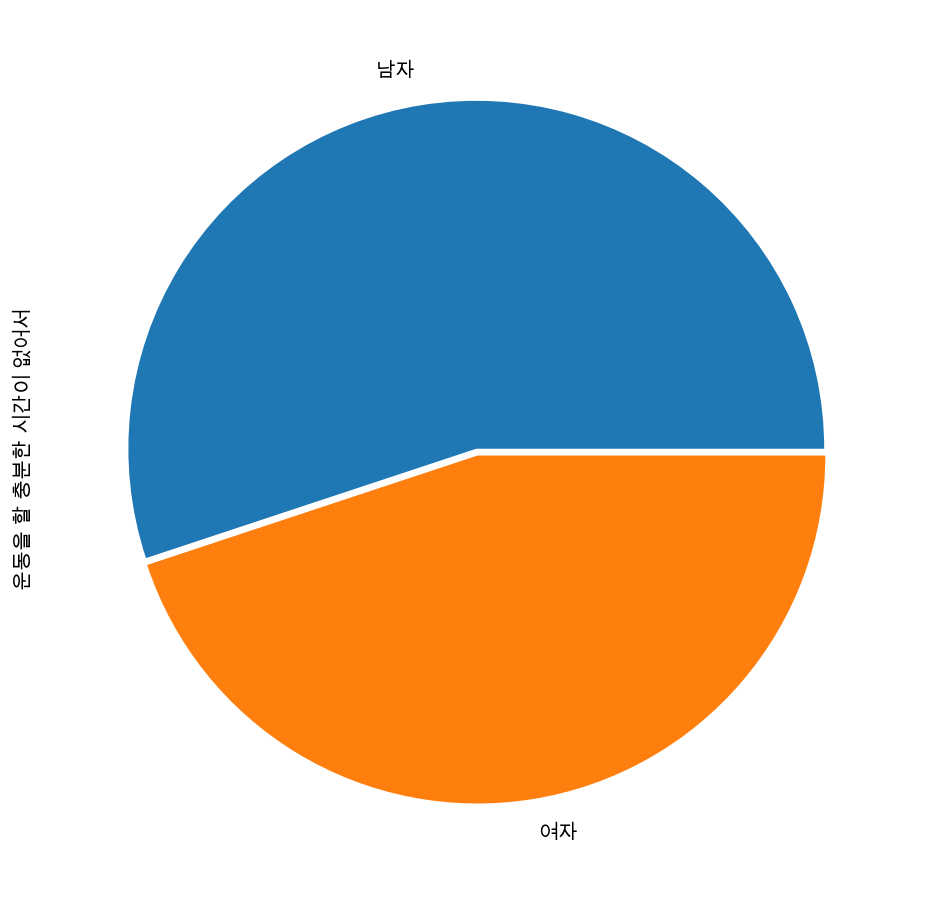

In [132]:
plt.figure(figsize=(10, 8))
raw_data["운동을 할 충분한 시간이 없어서"].plot.pie(explode=[0, 0.02])
plt.show()

2

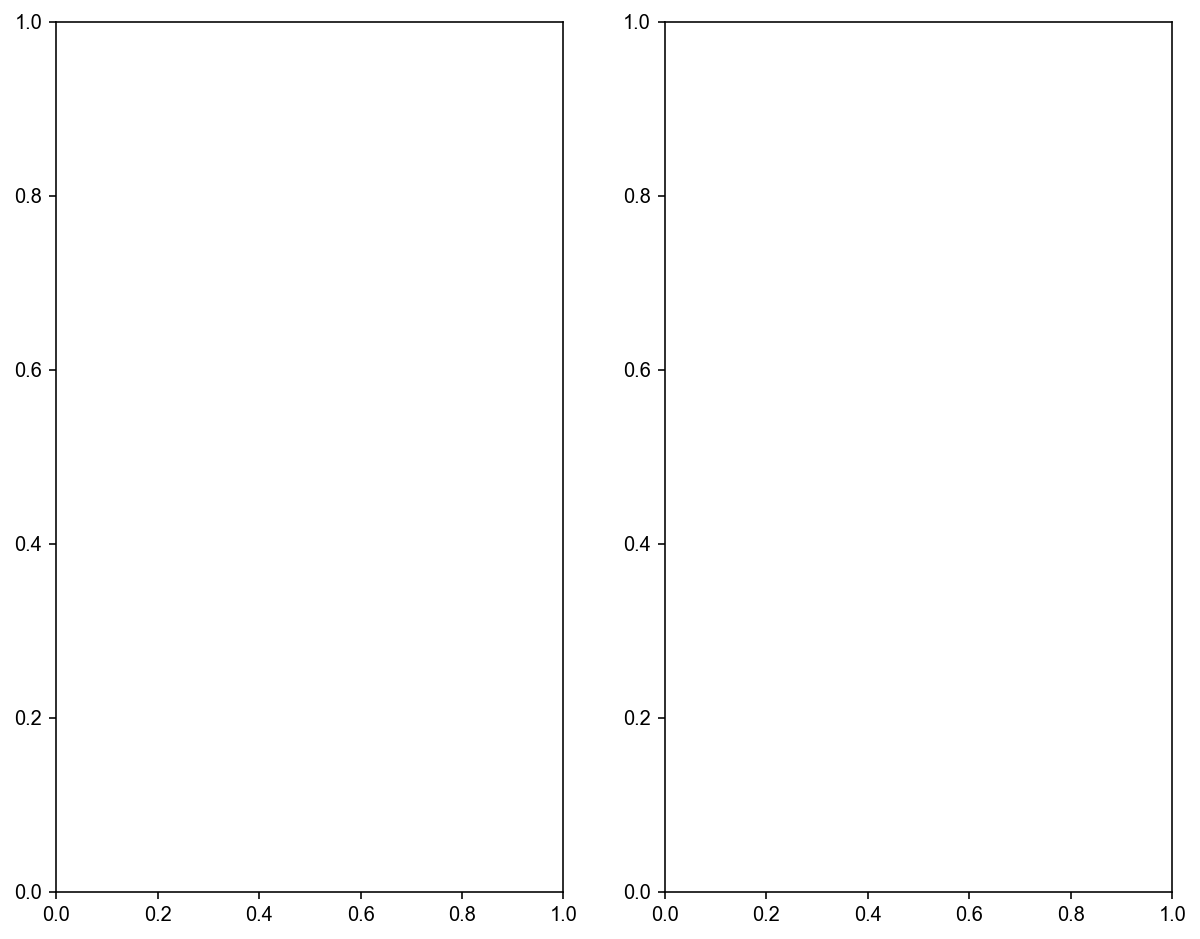

In [133]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
len(ax)

<AxesSubplot:ylabel='함께 운동을 할 사람이 없어서'>

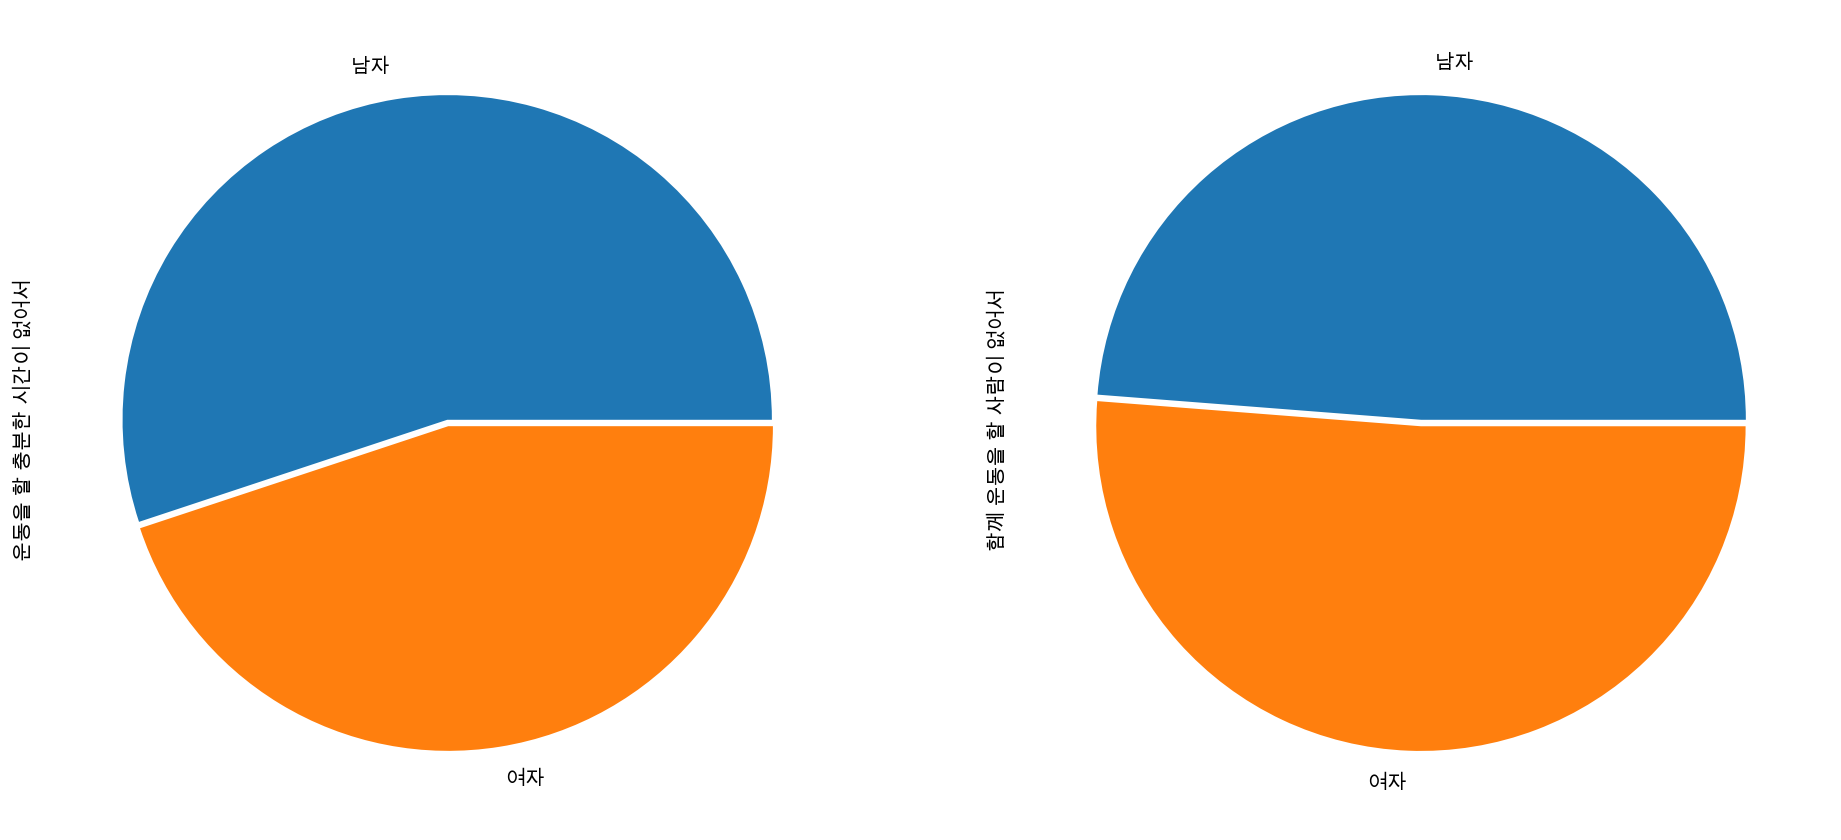

In [135]:
f, ax = plt.subplots(1, 2, figsize=(16,8))

raw_data["운동을 할 충분한 시간이 없어서"].plot.pie(explode=[0, 0.02], ax=ax[0])
raw_data["함께 운동을 할 사람이 없어서"].plot.pie(explode=[0, 0.02], ax=ax[1])

Text(0, 0.5, '')

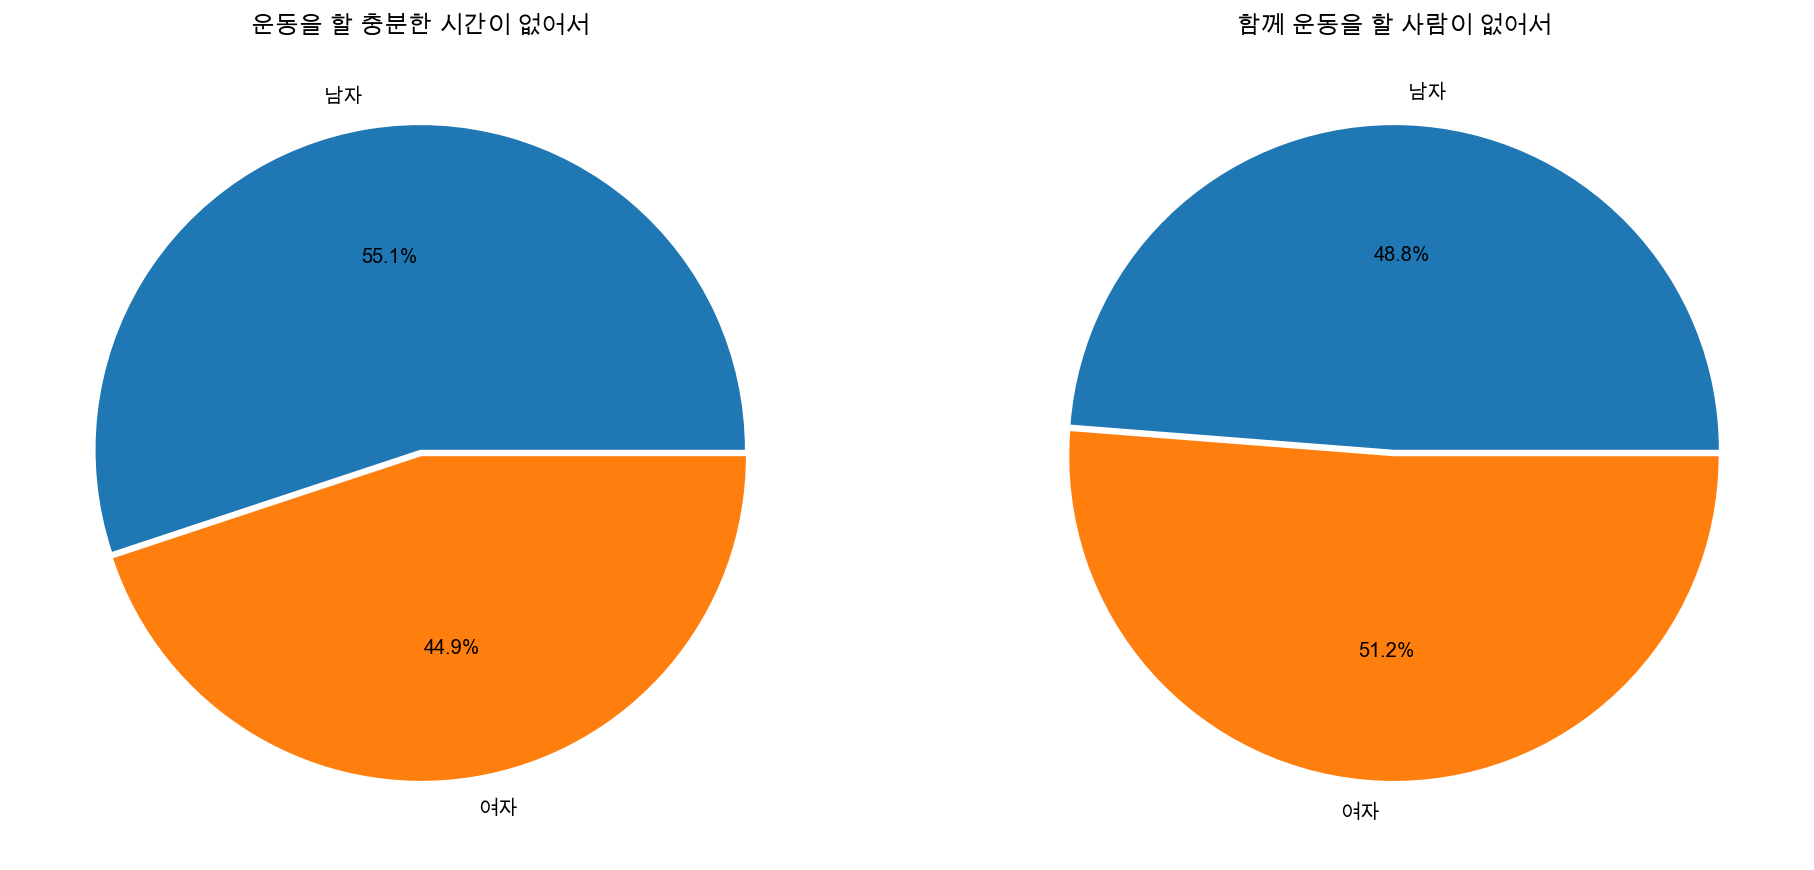

In [134]:
f, ax = plt.subplots(1, 2, figsize=(16,8))
raw_data["운동을 할 충분한 시간이 없어서"].plot.pie(explode=[0, 0.02],
                                      ax=ax[0], autopct='%1.1f%%')
ax[0].set_title("운동을 할 충분한 시간이 없어서")
ax[0].set_ylabel('')

raw_data["함께 운동을 할 사람이 없어서"].plot.pie(explode=[0, 0.02],
                                      ax=ax[1], autopct='%1.1f%%')
ax[1].set_title("함께 운동을 할 사람이 없어서")
ax[1].set_ylabel('')

## 서울시 흡연율

In [137]:
raw_data = pd.read_csv("./data/report-2.txt", sep="\t")
raw_data.head()

,기간,구분,구분.1,전체,남자,여자
0,2017,서울시,서울시,18.8,35.1,3.3
1,2017,생애주기별,19~29세,19.6,33.6,5.7
2,2017,생애주기별,30~44세,23.6,43.1,3.9
3,2017,생애주기별,45~64세,19.2,37.3,2.5
4,2017,생애주기별,65세 이상,8.4,16.7,1.5


In [138]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      39 non-null     int64  
 1   구분      39 non-null     object 
 2   구분.1    39 non-null     object 
 3   전체      39 non-null     float64
 4   남자      39 non-null     float64
 5   여자      39 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ KB


In [139]:
raw_data["구분"].unique()

array(['서울시', '생애주기별', '교육수준별Ⅰ(30~64세)', '교육수준별Ⅱ(65세 이상)', '직업별(30~64세)',
       '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [140]:
raw_data["구분.1"].unique()

array(['서울시', '19~29세', '30~44세', '45~64세', '65세 이상', '중졸이하', '고졸',
       '대졸이상', '초졸이하', '중졸', '고졸이상', '육체직', '서비스ㆍ판매직', '사무직', '종로구', '중구',
       '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구',
       '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [141]:
raw_data[raw_data["구분"]=="생애주기별"]

,기간,구분,구분.1,전체,남자,여자
1,2017,생애주기별,19~29세,19.6,33.6,5.7
2,2017,생애주기별,30~44세,23.6,43.1,3.9
3,2017,생애주기별,45~64세,19.2,37.3,2.5
4,2017,생애주기별,65세 이상,8.4,16.7,1.5


In [142]:
raw_data[raw_data["구분"]=="생애주기별"][["구분.1", "전체", "남자", "여자"]]

,구분.1,전체,남자,여자
1,19~29세,19.6,33.6,5.7
2,30~44세,23.6,43.1,3.9
3,45~64세,19.2,37.3,2.5
4,65세 이상,8.4,16.7,1.5


In [145]:
smoke_age = raw_data[raw_data["구분"]=="생애주기별"][["구분.1", "전체", "남자", "여자"]]
smoke_age

,구분.1,전체,남자,여자
1,19~29세,19.6,33.6,5.7
2,30~44세,23.6,43.1,3.9
3,45~64세,19.2,37.3,2.5
4,65세 이상,8.4,16.7,1.5


In [147]:
import seaborn as sns

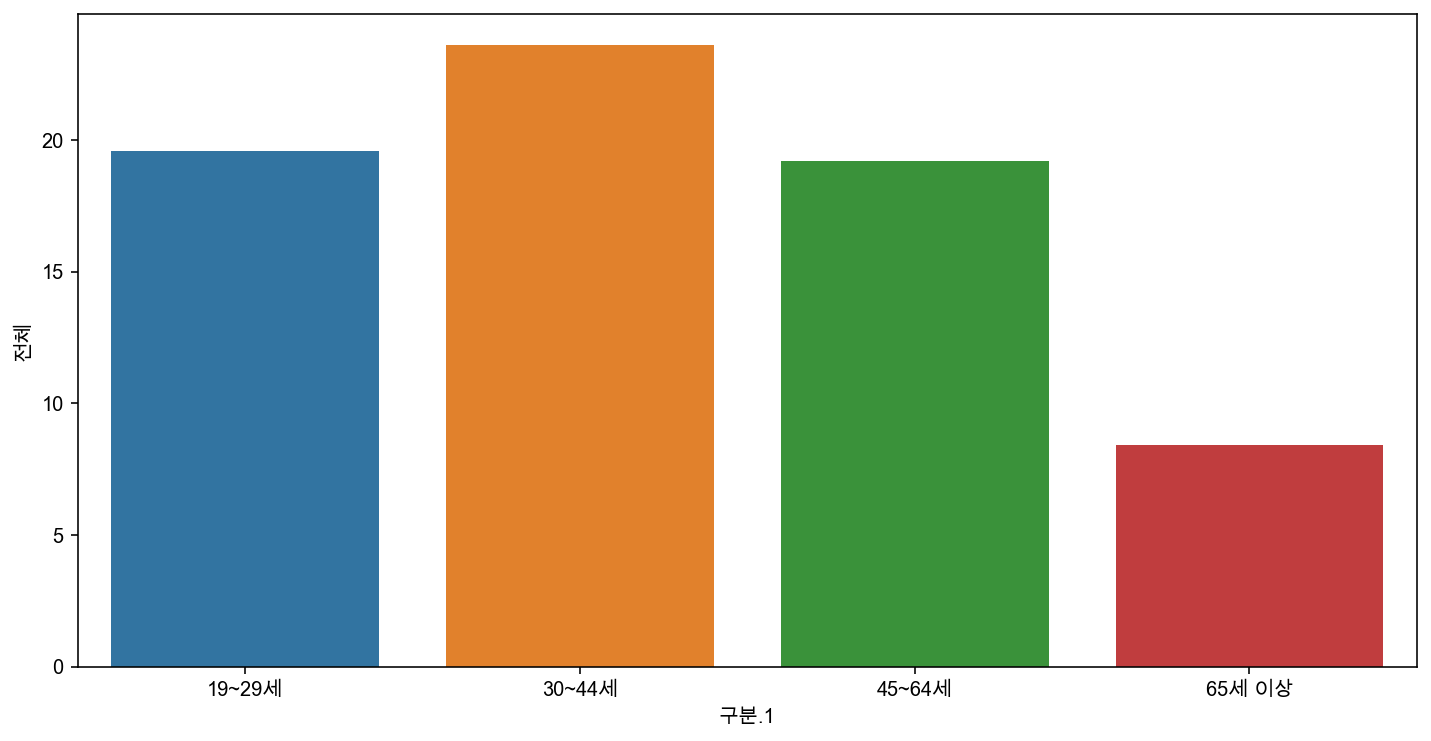

In [149]:
plt.figure(figsize=(12, 6))
sns.barplot(x="구분.1", y="전체", data=smoke_age)
plt.show()

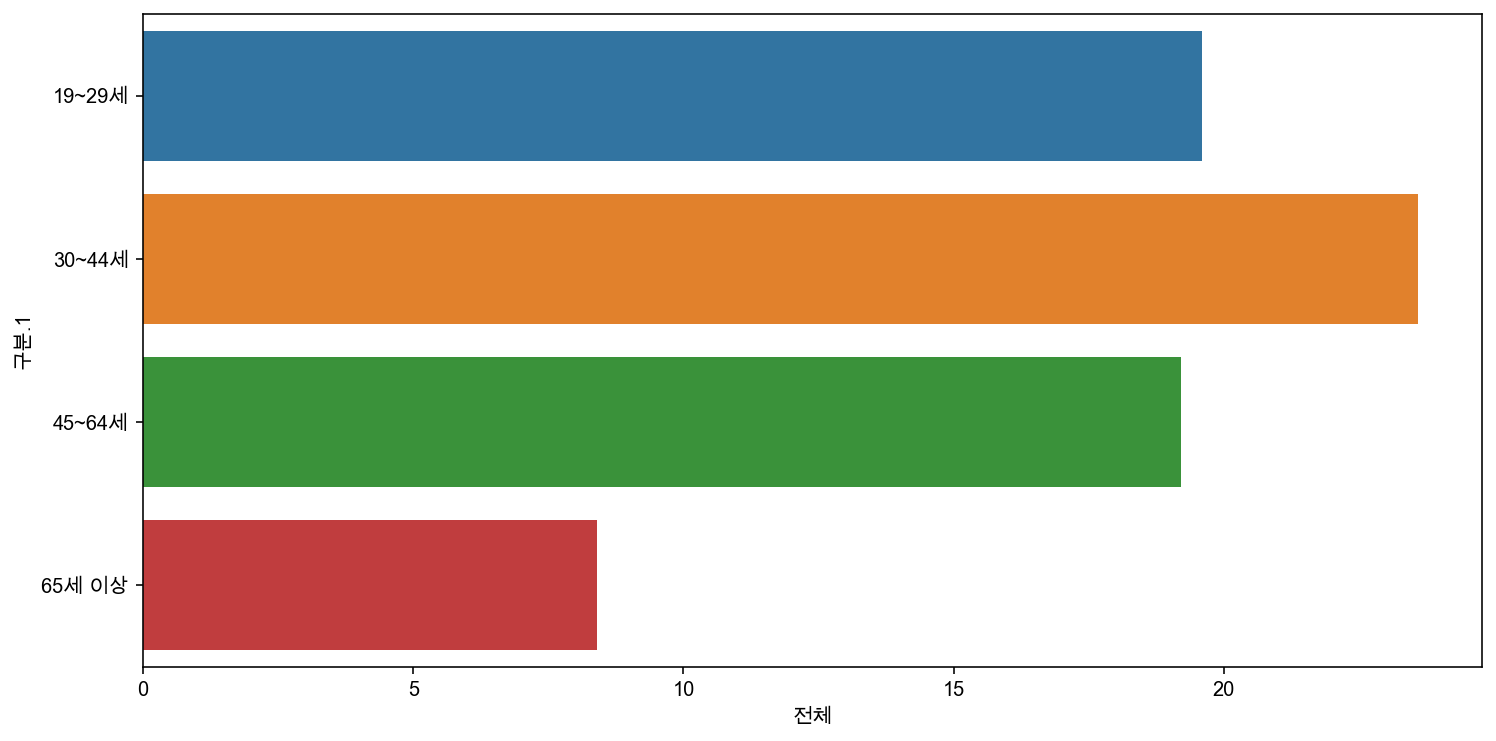

In [150]:
plt.figure(figsize=(12,6))
sns.barplot(x="전체", y="구분.1", data=smoke_age);

<function matplotlib.pyplot.show(close=None, block=None)>

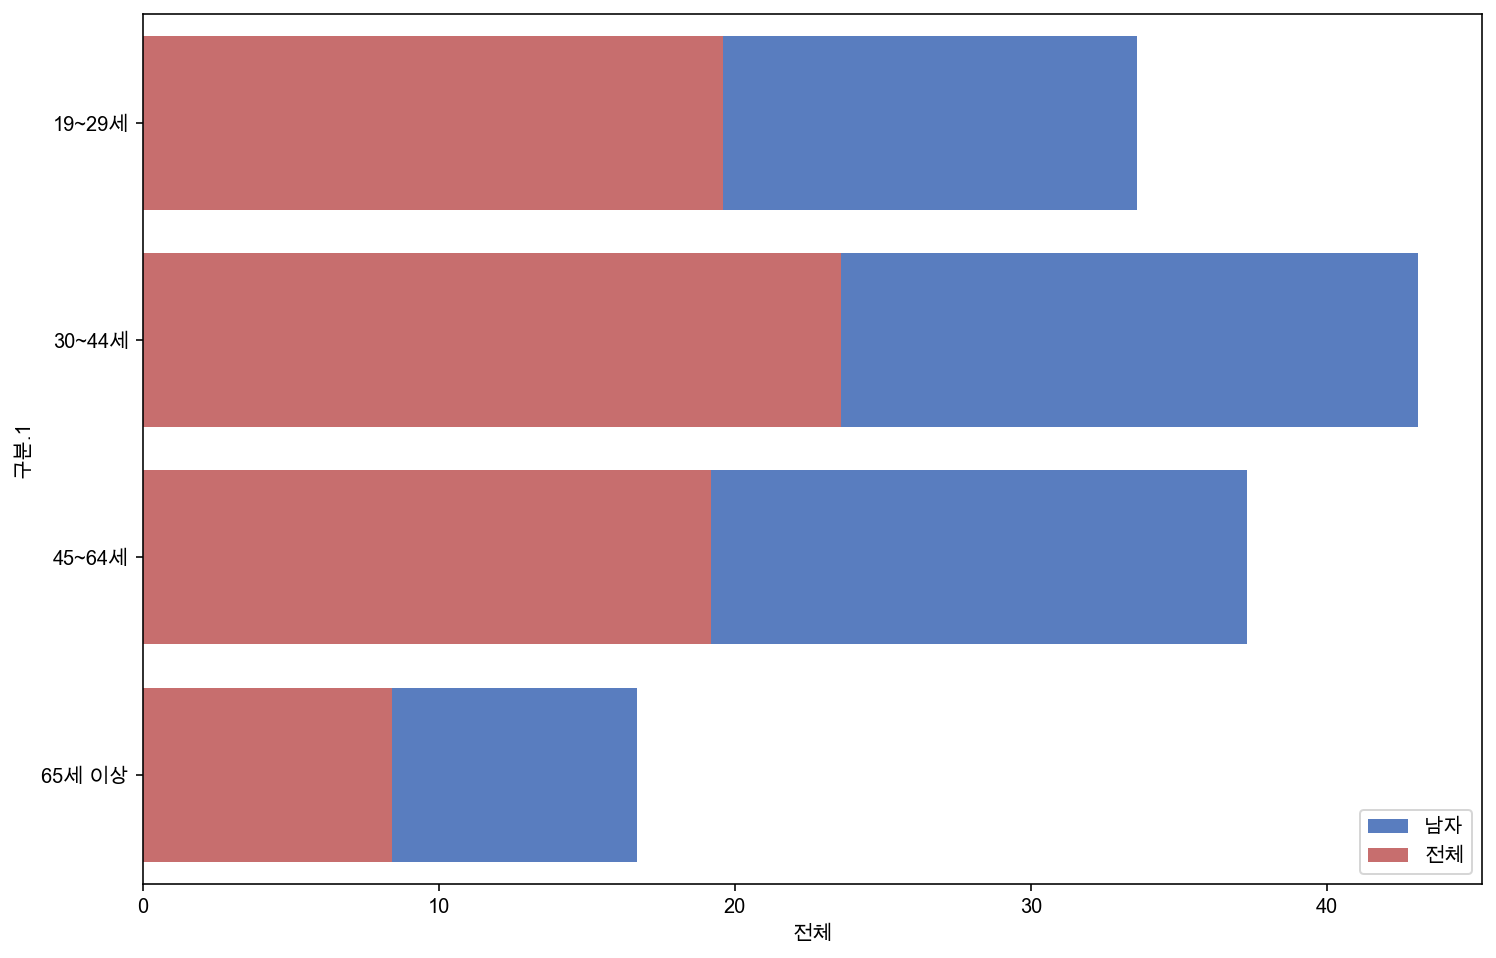

In [157]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="남자", y="구분.1", data=smoke_age, label="남자", color='b')
sns.barplot(x="전체", y="구분.1", data=smoke_age, label="전체", color='r')
plt.legend(loc="lower right")
plt.show

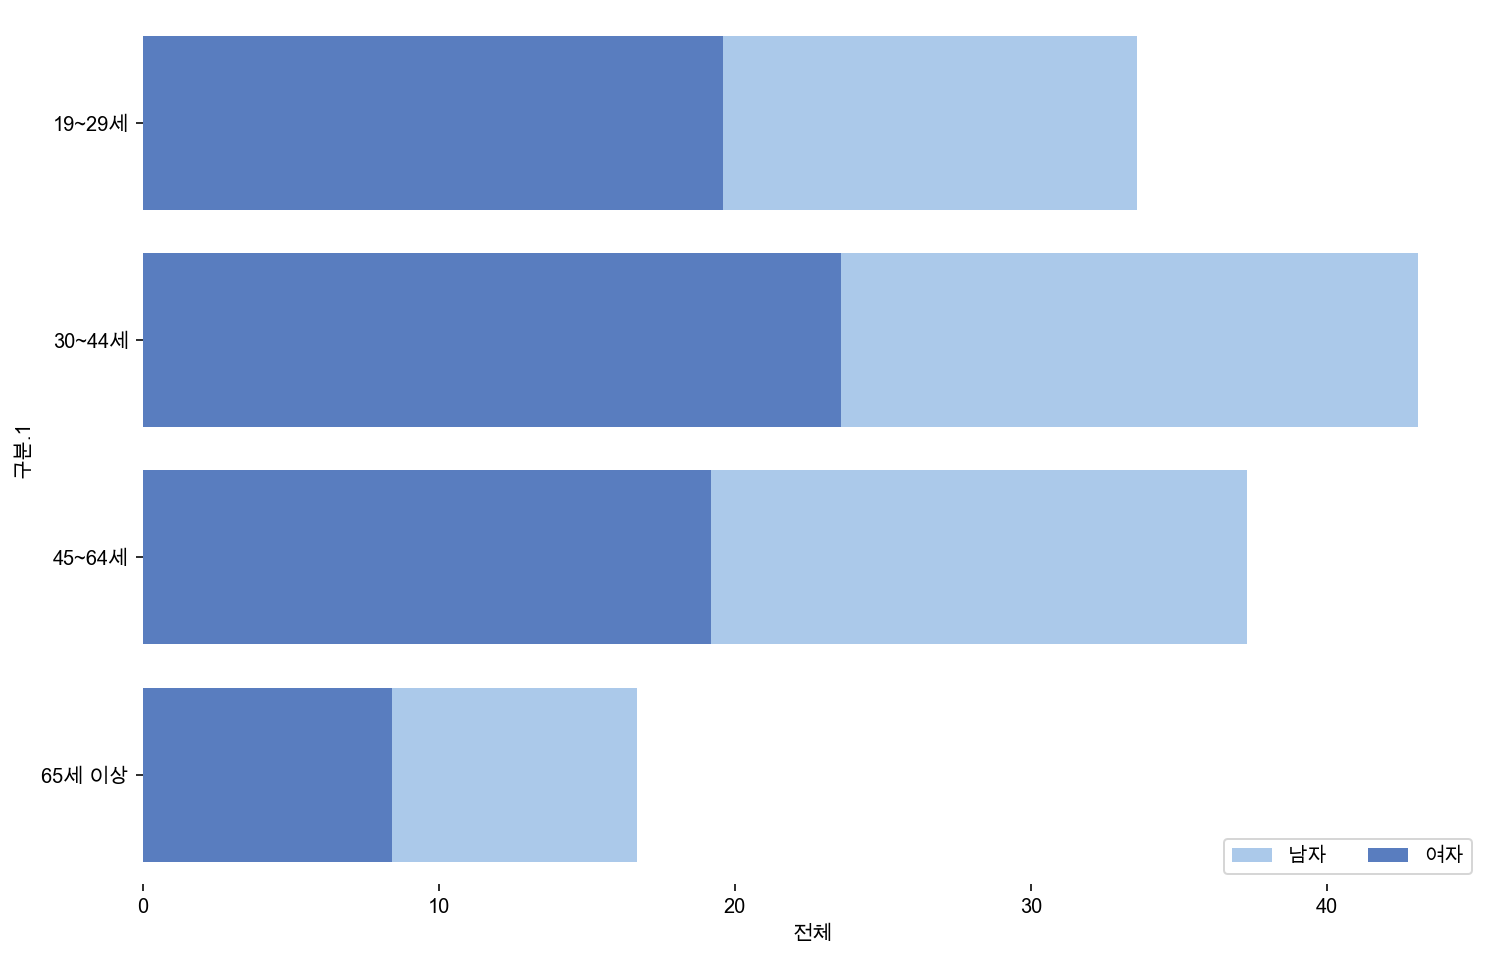

In [158]:
f, ax = plt.subplots(figsize=(12, 8))
sns.set_color_codes("pastel")
sns.barplot(x="남자", y="구분.1", data=smoke_age, label="남자", color="b")

sns.set_color_codes("muted")
sns.barplot(x="전체", y="구분.1", data=smoke_age, label="여자", color="b")

ax.legend(ncol = 2, loc = "lower right")
sns.despine(left=True, bottom=True)
plt.show()

## 서울시 인구 통계 자료

In [259]:
# pop_seoul = pd.read_csv("./data/report-3.txt", sep="\t")
pop_seoul = pd.read_csv("./data/report-3.txt", sep="\t", header=2, thousands=",") # 옵션 추가
pop_seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.2/4,합계,4384076,9985652,4859501,5126151,9720846,4732275,4988571,264806,127226,137580,2.22,1534957
1,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203
2,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035
3,2020.2/4,용산구,111586,245362,119494,125868,229431,110527,118904,15931,8967,6964,2.06,39650
4,2020.2/4,성동구,135937,304851,148554,156297,297397,145258,152139,7454,3296,4158,2.19,45005


In [260]:
pop_seoul = pop_seoul[["자치구", "계", "남자", "여자", "계.2", "65세이상고령자"]]
pop_seoul.tail()

,자치구,계,남자,여자,계.2,65세이상고령자
21,관악구,516318,258740,257578,16578,77341
22,서초구,433062,207095,225967,4143,59063
23,강남구,546158,261187,284971,4925,73097
24,송파구,678067,327383,350684,6555,90700
25,강동구,461547,227242,234305,4383,67742


In [261]:
pop_seoul.columns = ["구", "전체", "남자", "여자", "외국인", "65세이상"]
pop_seoul.head()

,구,전체,남자,여자,외국인,65세이상
0,합계,9985652,4859501,5126151,264806,1534957
1,종로구,160520,77745,82775,10137,28203
2,중구,136030,66545,69485,9938,24035
3,용산구,245362,119494,125868,15931,39650
4,성동구,304851,148554,156297,7454,45005


In [262]:
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구,전체,남자,여자,외국인,65세이상
1,종로구,160520,77745,82775,10137,28203
2,중구,136030,66545,69485,9938,24035
3,용산구,245362,119494,125868,15931,39650
4,성동구,304851,148554,156297,7454,45005
5,광진구,363925,175083,188842,14351,49457


In [263]:
pop_seoul["외국인비율"] = pop_seoul["외국인"] / pop_seoul["전체"] * 100
pop_seoul["고령자비율"] = pop_seoul["65세이상"] / pop_seoul["전체"] * 100
pop_seoul.head()

,구,전체,남자,여자,외국인,65세이상,외국인비율,고령자비율
1,종로구,160520,77745,82775,10137,28203,6.315101,17.569773
2,중구,136030,66545,69485,9938,24035,7.305741,17.668897
3,용산구,245362,119494,125868,15931,39650,6.492855,16.159797
4,성동구,304851,148554,156297,7454,45005,2.445129,14.762950
5,광진구,363925,175083,188842,14351,49457,3.943395,13.589888


In [264]:
pop_seoul.sort_values(by="외국인비율", ascending=False).head()
pop_seoul.sort_values(by="고령자비율", ascending=False).head()

,구,전체,남자,여자,외국인,65세이상,외국인비율,고령자비율
9,강북구,315395,153389,162006,3622,62338,1.148401,19.765057
10,도봉구,331744,161724,170020,2184,60784,0.658339,18.322562
2,중구,136030,66545,69485,9938,24035,7.305741,17.668897
1,종로구,160520,77745,82775,10137,28203,6.315101,17.569773
12,은평구,483938,232423,251515,4414,83272,0.912100,17.207163


In [265]:
# 한글
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "/Library/Fonts/Arial Unicode.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [266]:
pop_seoul.set_index("구", inplace=True)
pop_seoul.head()

,전체,남자,여자,외국인,65세이상,외국인비율,고령자비율
구,,,,,,,
종로구,160520,77745,82775,10137,28203,6.315101,17.569773
중구,136030,66545,69485,9938,24035,7.305741,17.668897
용산구,245362,119494,125868,15931,39650,6.492855,16.159797
성동구,304851,148554,156297,7454,45005,2.445129,14.762950
광진구,363925,175083,188842,14351,49457,3.943395,13.589888


In [1]:
pop_seoul["전체"].sort_values().plot(kind="barh", grid=True, figsize=(10, 10));

NameError: name 'pop_seoul' is not defined

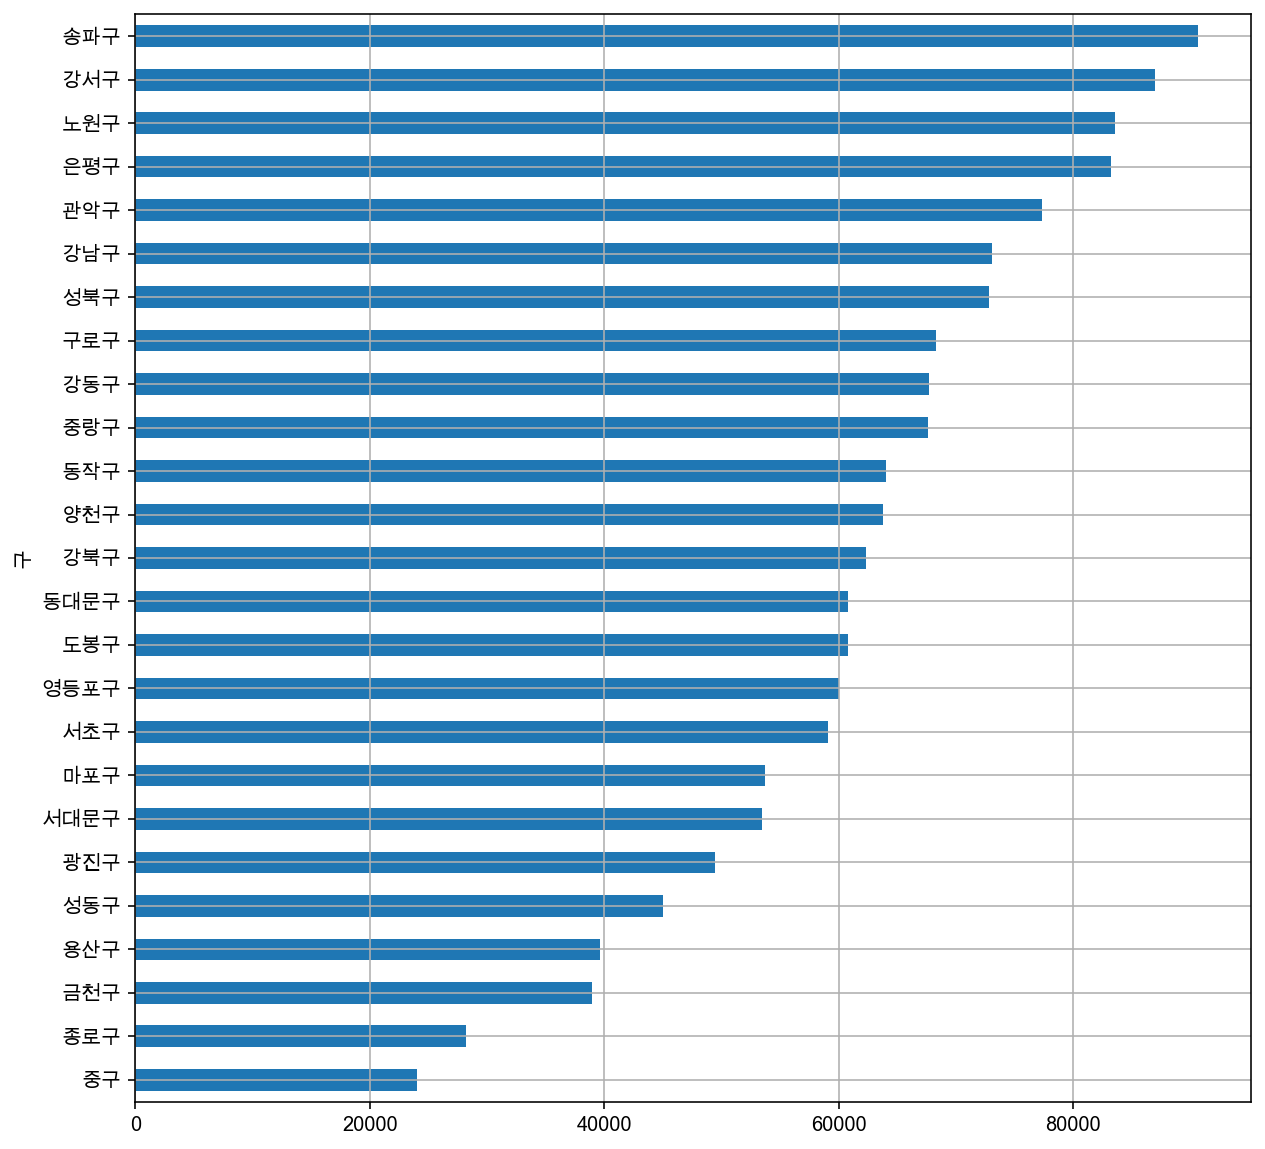

In [268]:
pop_seoul["65세이상"].sort_values().plot(kind="barh", grid=True, figsize=(10, 10));

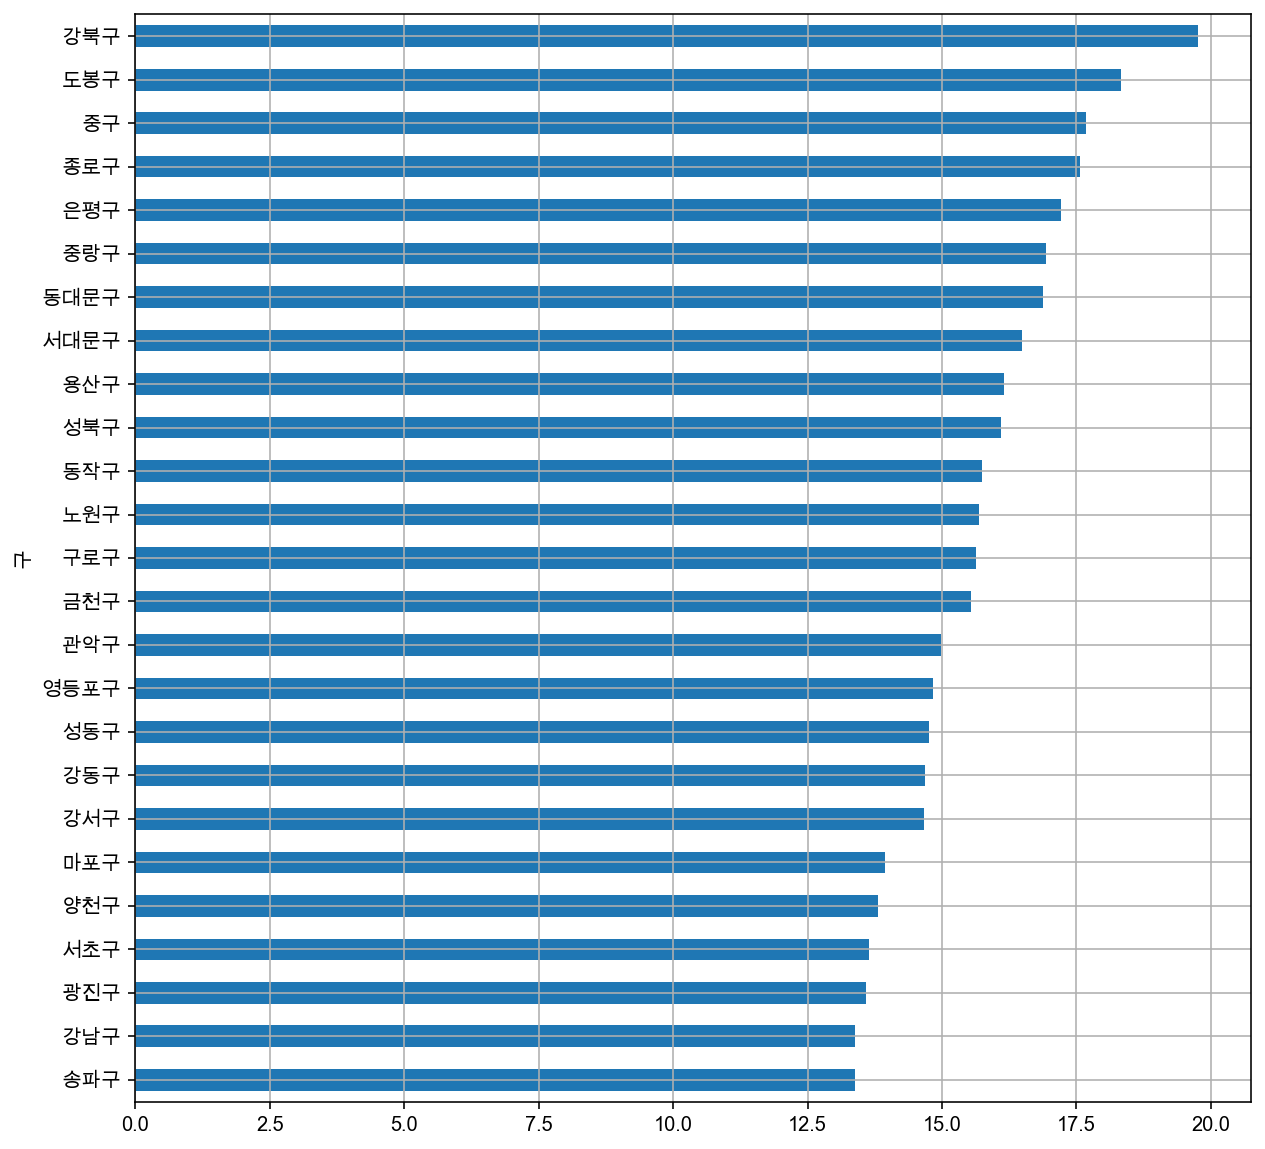

In [269]:
pop_seoul["고령자비율"].sort_values().plot(kind="barh", grid=True, figsize=(10, 10));

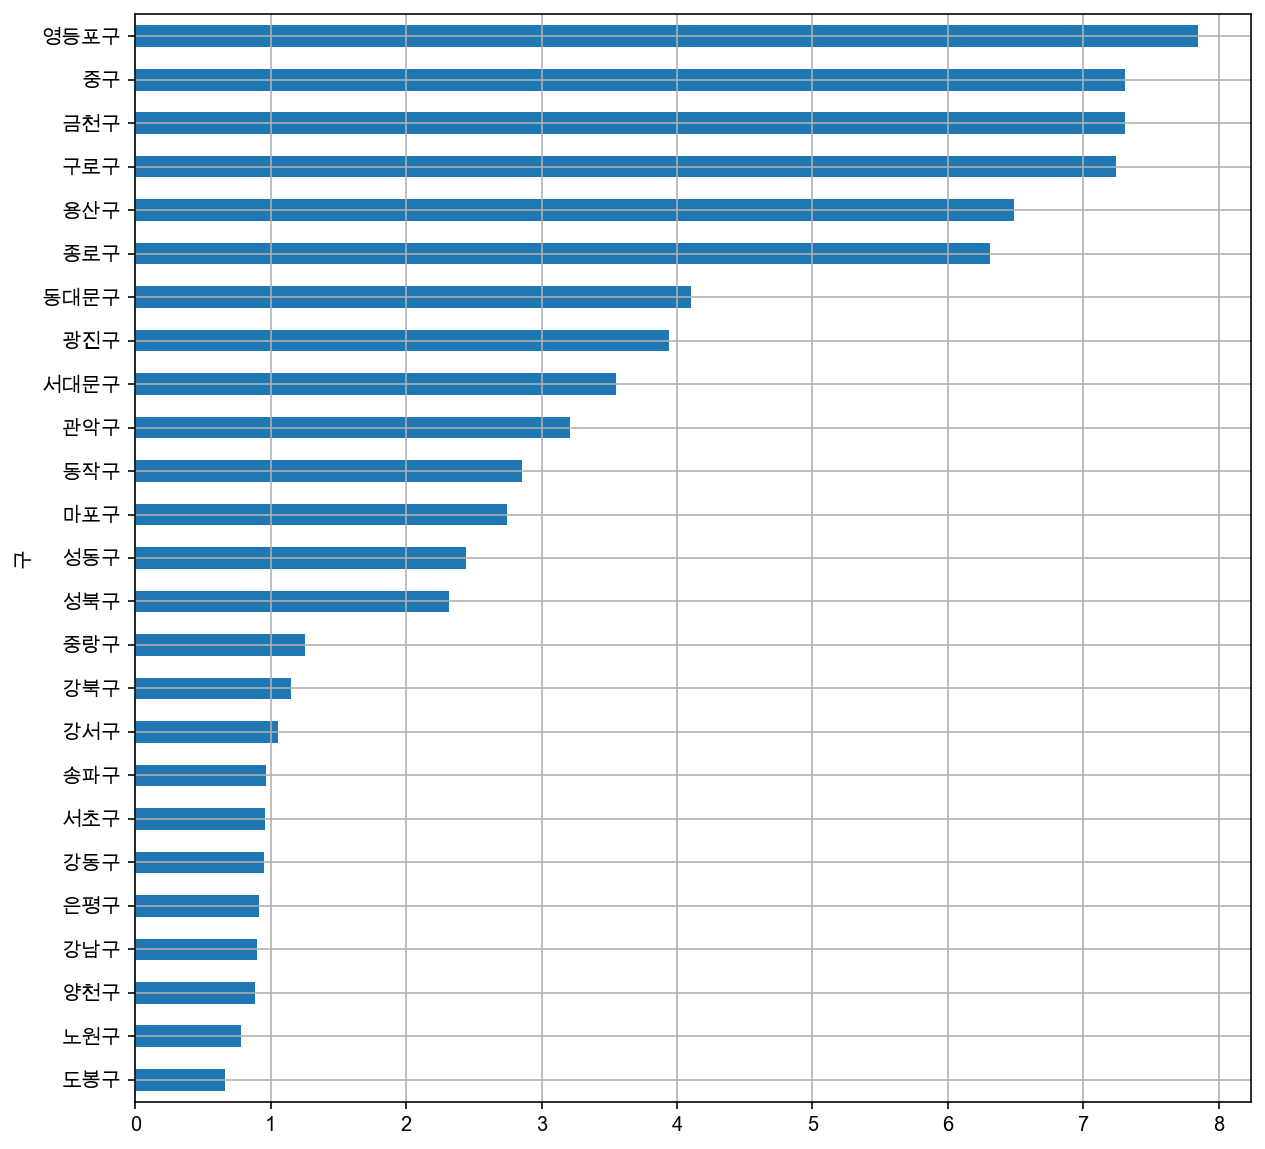

In [270]:
pop_seoul["외국인비율"].sort_values().plot(kind="barh", grid=True, figsize=(10, 10));

## 서울시 5대 범죄 통계

In [28]:
crime_raw_data = pd.read_csv("./data/2017_crime.csv", encoding="euc-kr")
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,0
1,중부,살인,검거,0
2,중부,강도,발생,6
3,중부,강도,검거,6
4,중부,강간,발생,173


In [29]:
crime_raw_data = crime_raw_data[crime_raw_data["죄종"].notnull()]
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 12.1+ KB


In [30]:
# 피봇 테이블로 경찰서별로 정리
crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=["구분"], columns=["죄종", "발생검거"], aggfunc=[np.sum])

crime_station.head()

sum                                             
       건수                                             
죄종     강간       강도      살인        절도          폭력      
발생검거   검거   발생  검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남    366  456  16  13   6   6   787  2069  1942  2229
강동    169  172  12  10   6   5   949  1645  2109  2429
강북    153  208   5   7   8   8   635  1014  2023  2156
강서    253  316   6   4  11  11  1113  1888  2544  2916
관악    323  379   6   7   7   8  1152  1979  2666  3152

In [31]:
crime_station.columns = crime_station.columns.droplevel([0, 1])

In [32]:
crime_station["강도", "검거"]

구분
강남     16
강동     12
강북      5
강서      6
관악      6
광진      8
구로      6
금천      5
남대문     3
노원      7
도봉      3
동대문     5
동작      9
마포      8
방배      5
서대문     2
서부      2
서초      2
성동      3
성북      5
송파      3
수서      8
양천      2
영등포     5
용산      4
은평      2
종로      4
종암      3
중랑      4
중부      6
혜화      4
Name: (강도, 검거), dtype: int64

In [33]:
tmp = crime_station.columns.get_level_values(0) + crime_station.columns.get_level_values(1)
tmp

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [34]:
crime_station.columns = tmp
crime_station.head()
# 이건 구별로 정리된 것이 아니라 경찰서별로 정리되어 있기 때문에
# 경찰서 이름으로 경찰서가 위치해 있는 구 파악해야함

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229
강동,169,172,12,10,6,5,949,1645,2109,2429
강북,153,208,5,7,8,8,635,1014,2023,2156
강서,253,316,6,4,11,11,1113,1888,2544,2916
관악,323,379,6,7,7,8,1152,1979,2666,3152


In [35]:
crime_station.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

In [36]:
station_names = ["혜화", "남대문", "중부", "종암", "서부", "방배", "수서"]
gu_names = ["종로구", "중구", "중구", "성북구", "은평구", "서초구", "강남구"]

In [37]:
# 반복문 작업
tmp_gu = []
for idx, _ in crime_station.iterrows():  # iterrow 많이 쓰는 함수
    if idx in station_names:
        tmp_gu.append(gu_names[station_names.index(idx)])
    else:
        tmp_gu.append(idx+"구")

In [38]:
crime_station["구"] = tmp_gu
crime_station

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229,강남구
강동,169,172,12,10,6,5,949,1645,2109,2429,강동구
강북,153,208,5,7,8,8,635,1014,2023,2156,강북구
강서,253,316,6,4,11,11,1113,1888,2544,2916,강서구
관악,323,379,6,7,7,8,1152,1979,2666,3152,관악구
광진,208,261,8,13,5,6,1168,2220,1900,2146,광진구
구로,181,328,6,8,8,7,869,1725,2344,2827,구로구
금천,212,240,5,5,5,5,674,1141,1676,1874,금천구
남대문,62,94,3,3,0,1,400,785,780,863,중구


In [39]:
crime_gu = pd.pivot_table(crime_station, index="구", aggfunc=np.sum)

crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956
강동구,169,172,12,10,6,5,949,1645,2109,2429
강북구,153,208,5,7,8,8,635,1014,2023,2156
강서구,253,316,6,4,11,11,1113,1888,2544,2916
관악구,323,379,6,7,7,8,1152,1979,2666,3152


In [40]:
crime_gu["살인발생"].sort_values(ascending=False).head()

구
영등포구    15
강서구     11
동대문구    11
서초구      9
강북구      8
Name: 살인발생, dtype: int64

In [41]:
crime_gu["폭력발생"].sort_values(ascending=False).head()

구
강남구     3956
영등포구    3190
관악구     3152
송파구     3007
강서구     2916
Name: 폭력발생, dtype: int64

In [42]:
crime_gu["강도발생"].sort_values(ascending=False).head()

구
강남구    20
서초구    13
광진구    13
종로구    10
강동구    10
Name: 강도발생, dtype: int64

In [43]:
crime_gu["절도발생"].sort_values(ascending=False).head()

구
강남구     3130
영등포구    2304
송파구     2274
광진구     2220
마포구     2094
Name: 절도발생, dtype: int64

## Pandas를 이용한 컬럼간 연산

In [44]:
# 검거율 구하기
target = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
num = ["강간검거", "강도검거", "살인검거", "절도검거", "폭력검거"]
den = ["강간발생", "강도발생", "살인발생", "절도발생", "폭력발생"]

crime_gu[target] = crime_gu[num].div(crime_gu[den].values)*100
crime_gu[num]
crime_gu[den].values 

array([[ 607,   20,    7, 3130, 3956],
       [ 172,   10,    5, 1645, 2429],
       [ 208,    7,    8, 1014, 2156],
       [ 316,    4,   11, 1888, 2916],
       [ 379,    7,    8, 1979, 3152],
       [ 261,   13,    6, 2220, 2146],
       [ 328,    8,    7, 1725, 2827],
       [ 240,    5,    5, 1141, 1874],
       [ 180,    9,    4, 1538, 2478],
       [ 104,    3,    1,  633, 1258],
       [ 165,    3,   11, 1547, 2249],
       [ 396,    7,    1, 1226, 1700],
       [ 500,    8,    3, 2094, 2673],
       [ 202,    1,    4, 1230, 1676],
       [ 470,   13,    9, 1812, 2404],
       [ 132,    3,    1, 1072, 1559],
       [ 173,    8,    7, 1344, 1902],
       [ 288,    1,    6, 2274, 3007],
       [ 138,    3,    3, 1590, 2148],
       [ 455,    5,   15, 2304, 3190],
       [ 327,    5,    1, 1346, 2381],
       [ 230,    4,    6, 1387, 2256],
       [ 253,   10,    7, 1644, 2143],
       [ 267,    9,    1, 1846, 2061],
       [ 172,    3,    5, 1533, 2858]])

In [45]:
crime_gu = crime_gu.drop(columns=num)
crime_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,120.000000,100.0,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,120.000000,120.0,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,316,4,11,1888,2916,80.063291,150.000000,100.0,58.951271,87.242798
관악구,379,7,8,1979,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [46]:
crime_gu[crime_gu[target] > 100] = 100
crime_gu

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,100.000000,100.000000,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,100.000000,100.000000,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.000000,62.623274,93.831169
강서구,316,4,11,1888,2916,80.063291,100.000000,100.000000,58.951271,87.242798
관악구,379,7,8,1979,3152,85.224274,85.714286,87.500000,58.211218,84.581218
광진구,261,13,6,2220,2146,79.693487,61.538462,83.333333,52.612613,88.536813
구로구,328,8,7,1725,2827,55.182927,75.000000,100.000000,50.376812,82.914751
금천구,240,5,5,1141,1874,88.333333,100.000000,100.000000,59.070990,89.434365
노원구,180,9,4,1538,2478,86.111111,77.777778,100.000000,49.219766,85.714286


In [47]:
crime_gu.rename(columns= {"강간발생" : "강간",
                         "강도발생" : "강도",
                         "살인발생" : "살인",
                         "절도발생" : "절도",
                         "폭력발생" : "폭력"},
                    inplace=True)
crime_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,100.000000,100.0,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,100.000000,100.0,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,316,4,11,1888,2916,80.063291,100.000000,100.0,58.951271,87.242798
관악구,379,7,8,1979,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [48]:
# 정규화
col = ["살인", "강도", "강간", "절도", "폭력"]
crime_gu_norm = crime_gu[col] / crime_gu[col].max()
crime_gu_norm.head()

,살인,강도,강간,절도,폭력
구,,,,,
강남구,0.466667,1.00,1.000000,1.000000,1.000000
강동구,0.333333,0.50,0.283361,0.525559,0.614004
강북구,0.533333,0.35,0.342669,0.323962,0.544995
강서구,0.733333,0.20,0.520593,0.603195,0.737108
관악구,0.533333,0.35,0.624382,0.632268,0.796764


In [49]:
col2 = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
crime_gu_norm[col2] = crime_gu[col2]
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,0.466667,1.00,1.000000,1.000000,1.000000,81.713344,100.000000,100.0,44.185304,86.223458
강동구,0.333333,0.50,0.283361,0.525559,0.614004,98.255814,100.000000,100.0,57.689970,86.825854
강북구,0.533333,0.35,0.342669,0.323962,0.544995,73.557692,71.428571,100.0,62.623274,93.831169
강서구,0.733333,0.20,0.520593,0.603195,0.737108,80.063291,100.000000,100.0,58.951271,87.242798
관악구,0.533333,0.35,0.624382,0.632268,0.796764,85.224274,85.714286,87.5,58.211218,84.581218


In [50]:
col = ["살인", "강도", "강간", "절도", "폭력"]
crime_gu_norm["범죄"] = np.mean(crime_gu_norm[col], axis=1)
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄
구,,,,,,,,,,,
강남구,0.466667,1.00,1.000000,1.000000,1.000000,81.713344,100.000000,100.0,44.185304,86.223458,0.893333
강동구,0.333333,0.50,0.283361,0.525559,0.614004,98.255814,100.000000,100.0,57.689970,86.825854,0.451251
강북구,0.533333,0.35,0.342669,0.323962,0.544995,73.557692,71.428571,100.0,62.623274,93.831169,0.418992
강서구,0.733333,0.20,0.520593,0.603195,0.737108,80.063291,100.000000,100.0,58.951271,87.242798,0.558846
관악구,0.533333,0.35,0.624382,0.632268,0.796764,85.224274,85.714286,87.5,58.211218,84.581218,0.587350


In [51]:
col2 = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
crime_gu_norm["검거"] = np.mean(crime_gu_norm[col2], axis=1)
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거
구,,,,,,,,,,,,
강남구,0.466667,1.00,1.000000,1.000000,1.000000,81.713344,100.000000,100.0,44.185304,86.223458,0.893333,82.424421
강동구,0.333333,0.50,0.283361,0.525559,0.614004,98.255814,100.000000,100.0,57.689970,86.825854,0.451251,88.554328
강북구,0.533333,0.35,0.342669,0.323962,0.544995,73.557692,71.428571,100.0,62.623274,93.831169,0.418992,80.288141
강서구,0.733333,0.20,0.520593,0.603195,0.737108,80.063291,100.000000,100.0,58.951271,87.242798,0.558846,85.251472
관악구,0.533333,0.35,0.624382,0.632268,0.796764,85.224274,85.714286,87.5,58.211218,84.581218,0.587350,80.246199


### 서울시 범죄 데이터 히트맵 그리기

In [52]:
# 한글
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "/Library/Fonts/Arial Unicode.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [53]:
import seaborn as sns

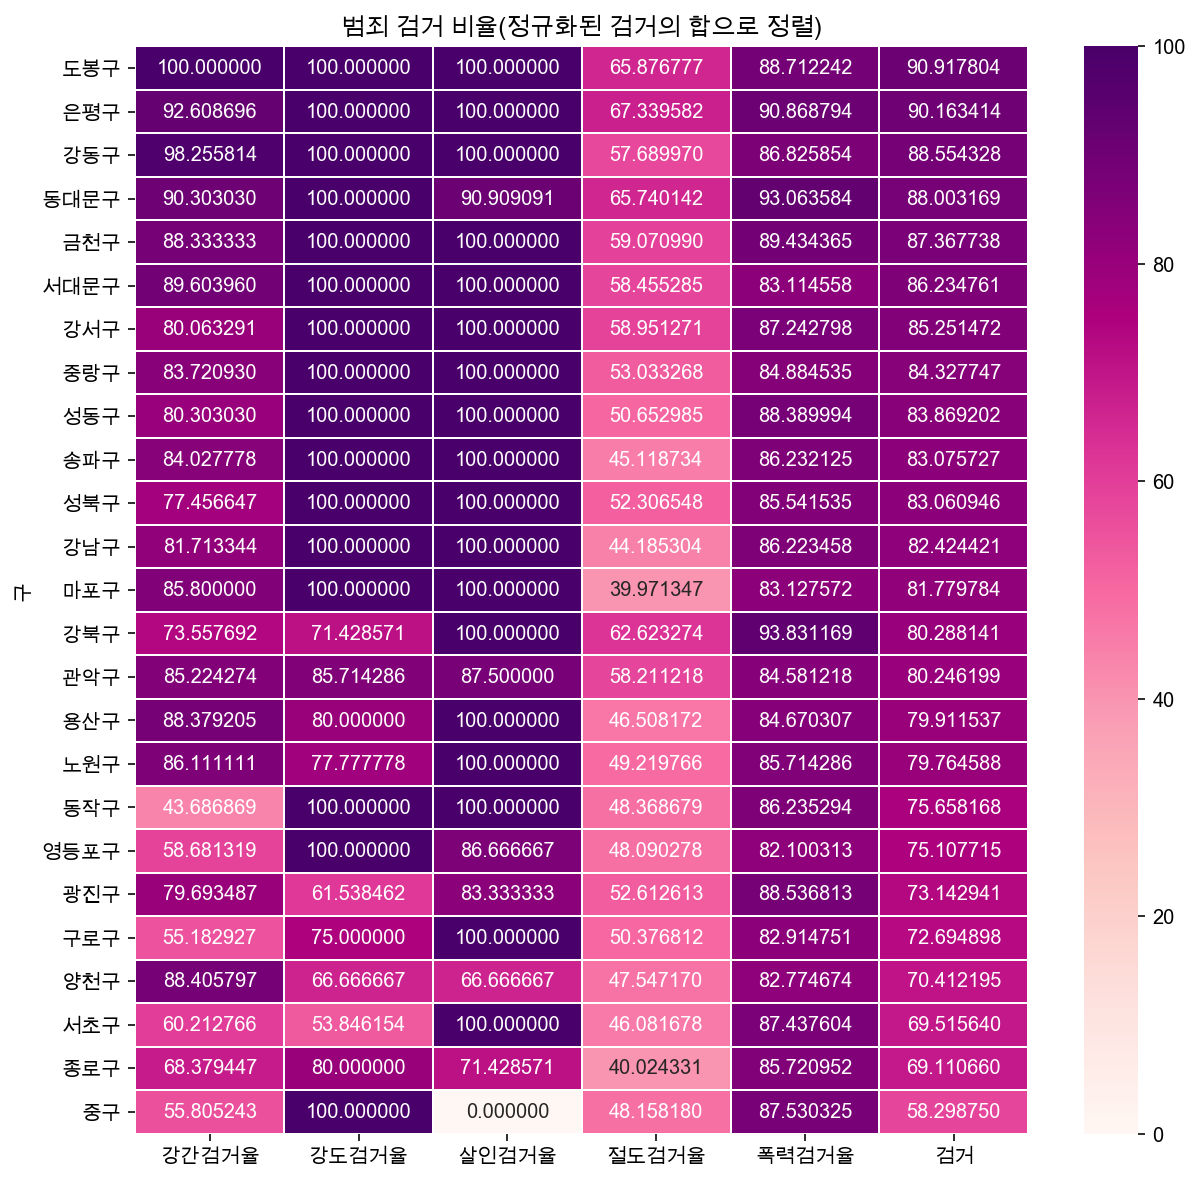

In [62]:
target_col = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율", "검거"]

crime_gu_norm_sort = crime_gu_norm.sort_values(by="검거", ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col],
            annot=True, fmt="f", linewidths=.5, cmap='RdPu')
plt.title("범죄 검거 비율(정규화된 검거의 합으로 정렬)")
plt.show()

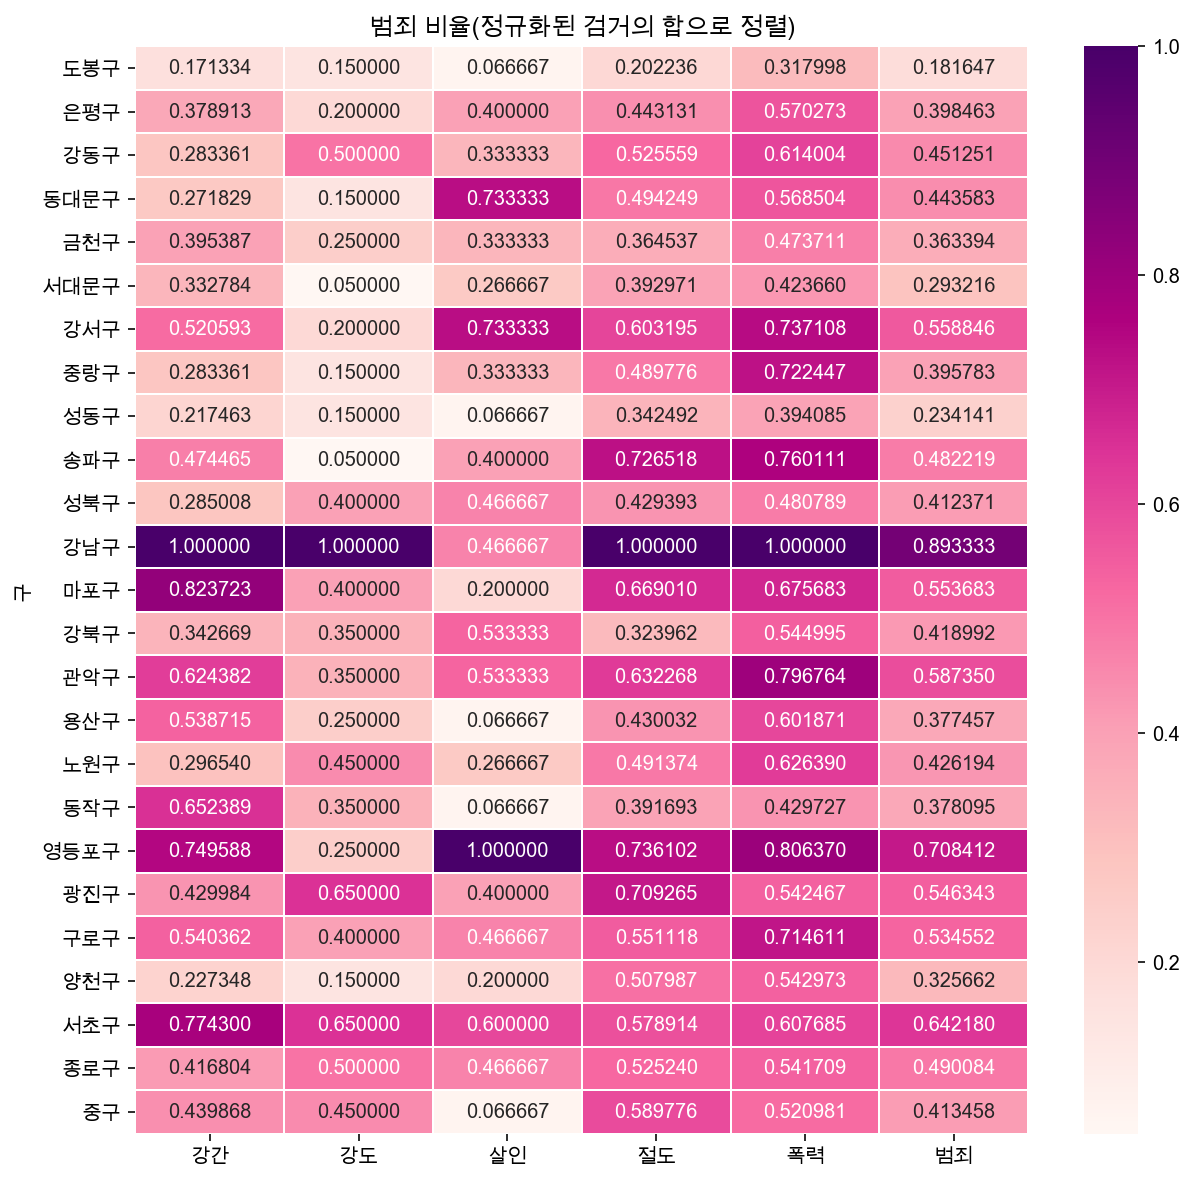

In [55]:
target_col = ["강간", "강도", "살인", "절도", "폭력", "범죄"]

crime_gu_norm_sort = crime_gu_norm.sort_values(by="검거", ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col],
            annot=True, fmt="f", linewidths=.5, cmap='RdPu')
plt.title("범죄 비율(정규화된 검거의 합으로 정렬)")
plt.show()

In [56]:
crime_gu.to_csv("./data/seoul_crime_result.csv", sep=",", encoding="UTF-8")

In [63]:
# ! -> 터미널 명령어

## 범죄 지도 시각화

In [64]:
import folium
import json

crime_gu = pd.read_csv("./data/seoul_crime_result.csv", encoding='utf-8')
geo_path = './data/03_skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding="utf-8"))

crime_gu.headad()

,구,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
0,강남구,607,20,7,3130,3956,81.713344,100.000000,100.0,44.185304,86.223458
1,강동구,172,10,5,1645,2429,98.255814,100.000000,100.0,57.689970,86.825854
2,강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169
3,강서구,316,4,11,1888,2916,80.063291,100.000000,100.0,58.951271,87.242798
4,관악구,379,7,8,1979,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [66]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="Stamen Toner")

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu, columns=["구", "살인"], # 강간, 폭력, 강도 등으로 조회 가능
    nan_fill_color="purple", nan_fill_opacity=0.4,
    key_on="feature.id", fill_color="PuRd",
    legend_name="살인 발생 건수"
).add_to(my_map)

my_map

In [72]:
import numpy as np

crime_raw_data = pd.read_csv("./data/seoul_crime/2000년.csv",
                            usecols=[0,1,2,3], encoding='euc-kr')

crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,17
3,중부,강도,검거,15
4,중부,강간,발생,14


In [74]:
crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=["구분"], columns=["죄종", "발생검거"], aggfunc=[np.sum])
crime_station.head()

sum                                            
      건수                                            
죄종    강간      강도       살인       절도          폭력      
발생검거  검거  발생  검거   발생  검거  발생   검거    발생    검거    발생
구분                                                  
강남    70  78  72  146   4   3  523  2653  4345  4892
강동    58  62  40   49  11  12  671  1838  4333  4716
강북    48  47  48   47   8   9  458   859  3446  3624
강서    64  75  55   75   7   6  509  1559  3988  4361
관악    44  59  36   56   7   8  349  1764  2658  2921

In [75]:
crime_station.columns = crime_station.columns.droplevel([0,1,2])
crime_station.head()

발생검거,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생
구분,,,,,,,,,,
강남,70,78,72,146,4,3,523,2653,4345,4892
강동,58,62,40,49,11,12,671,1838,4333,4716
강북,48,47,48,47,8,9,458,859,3446,3624
강서,64,75,55,75,7,6,509,1559,3988,4361
관악,44,59,36,56,7,8,349,1764,2658,2921


In [77]:
crime_station.columns = ["강간", "1", "강도", "2", "살인", "3", "절도", "4", "폭력", "5"]
crime_station = crime_station[["강간", "강도", "살인", "절도", "폭력"]]

crime_station.head()

,강간,강도,살인,절도,폭력
구분,,,,,
강남,70,72,4,523,4345
강동,58,40,11,671,4333
강북,48,48,8,458,3446
강서,64,55,7,509,3988
관악,44,36,7,349,2658


In [78]:
crime_station["year"] = 2000

crime_station.head()

,강간,강도,살인,절도,폭력,year
구분,,,,,,
강남,70,72,4,523,4345,2000
강동,58,40,11,671,4333,2000
강북,48,48,8,458,3446,2000
강서,64,55,7,509,3988,2000
관악,44,36,7,349,2658,2000


In [80]:
from glob import glob
glob('./data/seoul_crime/*')

['./data/seoul_crime/2016년.csv',
 './data/seoul_crime/2008년.csv',
 './data/seoul_crime/2004년.csv',
 './data/seoul_crime/2006년.csv',
 './data/seoul_crime/2014년.csv',
 './data/seoul_crime/2010년.csv',
 './data/seoul_crime/2002년.csv',
 './data/seoul_crime/2000년.csv',
 './data/seoul_crime/2012년.csv',
 './data/seoul_crime/2009년.csv',
 './data/seoul_crime/2017년.csv',
 './data/seoul_crime/2005년.csv',
 './data/seoul_crime/2007년.csv',
 './data/seoul_crime/2015년.csv',
 './data/seoul_crime/2011년.csv',
 './data/seoul_crime/2003년.csv',
 './data/seoul_crime/2001년.csv',
 './data/seoul_crime/2013년.csv']

In [81]:
file_list = glob("./data/seoul_crime/*.csv")
file_list

['./data/seoul_crime/2016년.csv',
 './data/seoul_crime/2008년.csv',
 './data/seoul_crime/2004년.csv',
 './data/seoul_crime/2006년.csv',
 './data/seoul_crime/2014년.csv',
 './data/seoul_crime/2010년.csv',
 './data/seoul_crime/2002년.csv',
 './data/seoul_crime/2000년.csv',
 './data/seoul_crime/2012년.csv',
 './data/seoul_crime/2009년.csv',
 './data/seoul_crime/2017년.csv',
 './data/seoul_crime/2005년.csv',
 './data/seoul_crime/2007년.csv',
 './data/seoul_crime/2015년.csv',
 './data/seoul_crime/2011년.csv',
 './data/seoul_crime/2003년.csv',
 './data/seoul_crime/2001년.csv',
 './data/seoul_crime/2013년.csv']

In [82]:
for each_file in file_list:
    print(each_file)

./data/seoul_crime/2016년.csv
./data/seoul_crime/2008년.csv
./data/seoul_crime/2004년.csv
./data/seoul_crime/2006년.csv
./data/seoul_crime/2014년.csv
./data/seoul_crime/2010년.csv
./data/seoul_crime/2002년.csv
./data/seoul_crime/2000년.csv
./data/seoul_crime/2012년.csv
./data/seoul_crime/2009년.csv
./data/seoul_crime/2017년.csv
./data/seoul_crime/2005년.csv
./data/seoul_crime/2007년.csv
./data/seoul_crime/2015년.csv
./data/seoul_crime/2011년.csv
./data/seoul_crime/2003년.csv
./data/seoul_crime/2001년.csv
./data/seoul_crime/2013년.csv


In [86]:
for each_file in file_list:
    print(each_file.split('/')[-1][:4])

2016
2008
2004
2006
2014
2010
2002
2000
2012
2009
2017
2005
2007
2015
2011
2003
2001
2013


In [ ]:
# crime_raw_data = pd.read_csv("./data/seoul_crime/2000년.csv",
#                             usecols=[0,1,2,3], encoding='euc-kr')

# crime_station = crime_raw_data.pivot_table(
#     crime_raw_data, index=["구분"], columns=["죄종", "발생검거"], aggfunc=[np.sum])

# crime_station.columns = crime_station.columns.droplevel([0,1,2])

# crime_station.columns = ["강간", "1", "강도", "2", "살인", "3", "절도", "4", "폭력", "5"]
# crime_station = crime_station[["강간", "강도", "살인", "절도", "폭력"]]

# crime_station["year"] = 2000

# crime_station.head()

In [88]:
crime_station_t = []

for each_file in file_list:
    crime_raw_data = pd.read_csv(each_file, usecols=[0,1,2,3], encoding='euc-kr')

    crime_station = crime_raw_data.pivot_table(
        crime_raw_data, index=["구분"], columns=["죄종", "발생검거"], aggfunc=[np.sum])

    crime_station.columns = crime_station.columns.droplevel([0,1,2])

    crime_station.columns = ["강간", "1", "강도", "2", "살인", "3", "절도", "4", "폭력", "5"]
    crime_station = crime_station[["강간", "강도", "살인", "절도", "폭력"]]

    crime_station["year"] = each_file.split("/")[-1][:4]

    crime_station.reset_index(inplace=True)
    crime_station_t.append(crime_station)

In [89]:
crime_total = pd.concat(crime_station_t)
crime_total.head()

,구분,강간,강도,살인,절도,폭력,year
0,강남,269.0,26.0,3.0,1129.0,2096.0,2016
1,강동,152.0,13.0,5.0,902.0,2201.0,2016
2,강북,159.0,4.0,6.0,672.0,2482.0,2016
3,강서,239.0,10.0,10.0,1070.0,2768.0,2016
4,관악,264.0,10.0,7.0,937.0,2707.0,2016


In [90]:
crime_total_murder = crime_total.pivot("year", "구분", "살인")
crime_total_murder

구분,강남,강동,강북,강서,관악,광진,구로,금천,남대문,노원,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
year,,,,,,,,,,,,,,,,,,,,,
2000,4.0,11.0,8.0,7.0,7.0,5.0,10.0,9.0,3.0,3.0,...,3.0,6.0,7.0,4.0,1.0,4.0,8.0,12.0,1.0,3.0
2001,18.0,11.0,4.0,18.0,2.0,18.0,5.0,16.0,6.0,9.0,...,5.0,8.0,9.0,3.0,7.0,3.0,12.0,17.0,0.0,4.0
2002,6.0,6.0,7.0,10.0,8.0,15.0,7.0,22.0,3.0,6.0,...,8.0,7.0,2.0,3.0,3.0,1.0,5.0,8.0,2.0,4.0
2003,10.0,6.0,8.0,5.0,3.0,8.0,6.0,14.0,2.0,4.0,...,4.0,7.0,9.0,12.0,6.0,3.0,4.0,13.0,0.0,6.0
2004,6.0,7.0,15.0,7.0,0.0,10.0,13.0,14.0,2.0,5.0,...,5.0,6.0,3.0,8.0,5.0,0.0,6.0,6.0,2.0,6.0
2005,10.0,6.0,9.0,8.0,4.0,16.0,11.0,14.0,1.0,11.0,...,5.0,10.0,3.0,9.0,6.0,3.0,5.0,15.0,3.0,2.0
2006,6.0,3.0,7.0,15.0,4.0,7.0,13.0,6.0,2.0,7.0,...,5.0,6.0,10.0,8.0,3.0,7.0,4.0,13.0,4.0,6.0
2007,4.0,9.0,12.0,3.0,10.0,8.0,19.0,6.0,1.0,10.0,...,3.0,8.0,12.0,7.0,6.0,4.0,9.0,14.0,4.0,2.0
2008,3.0,8.0,8.0,17.0,9.0,5.0,23.0,3.0,1.0,4.0,...,5.0,12.0,18.0,6.0,6.0,6.0,6.0,7.0,4.0,3.0


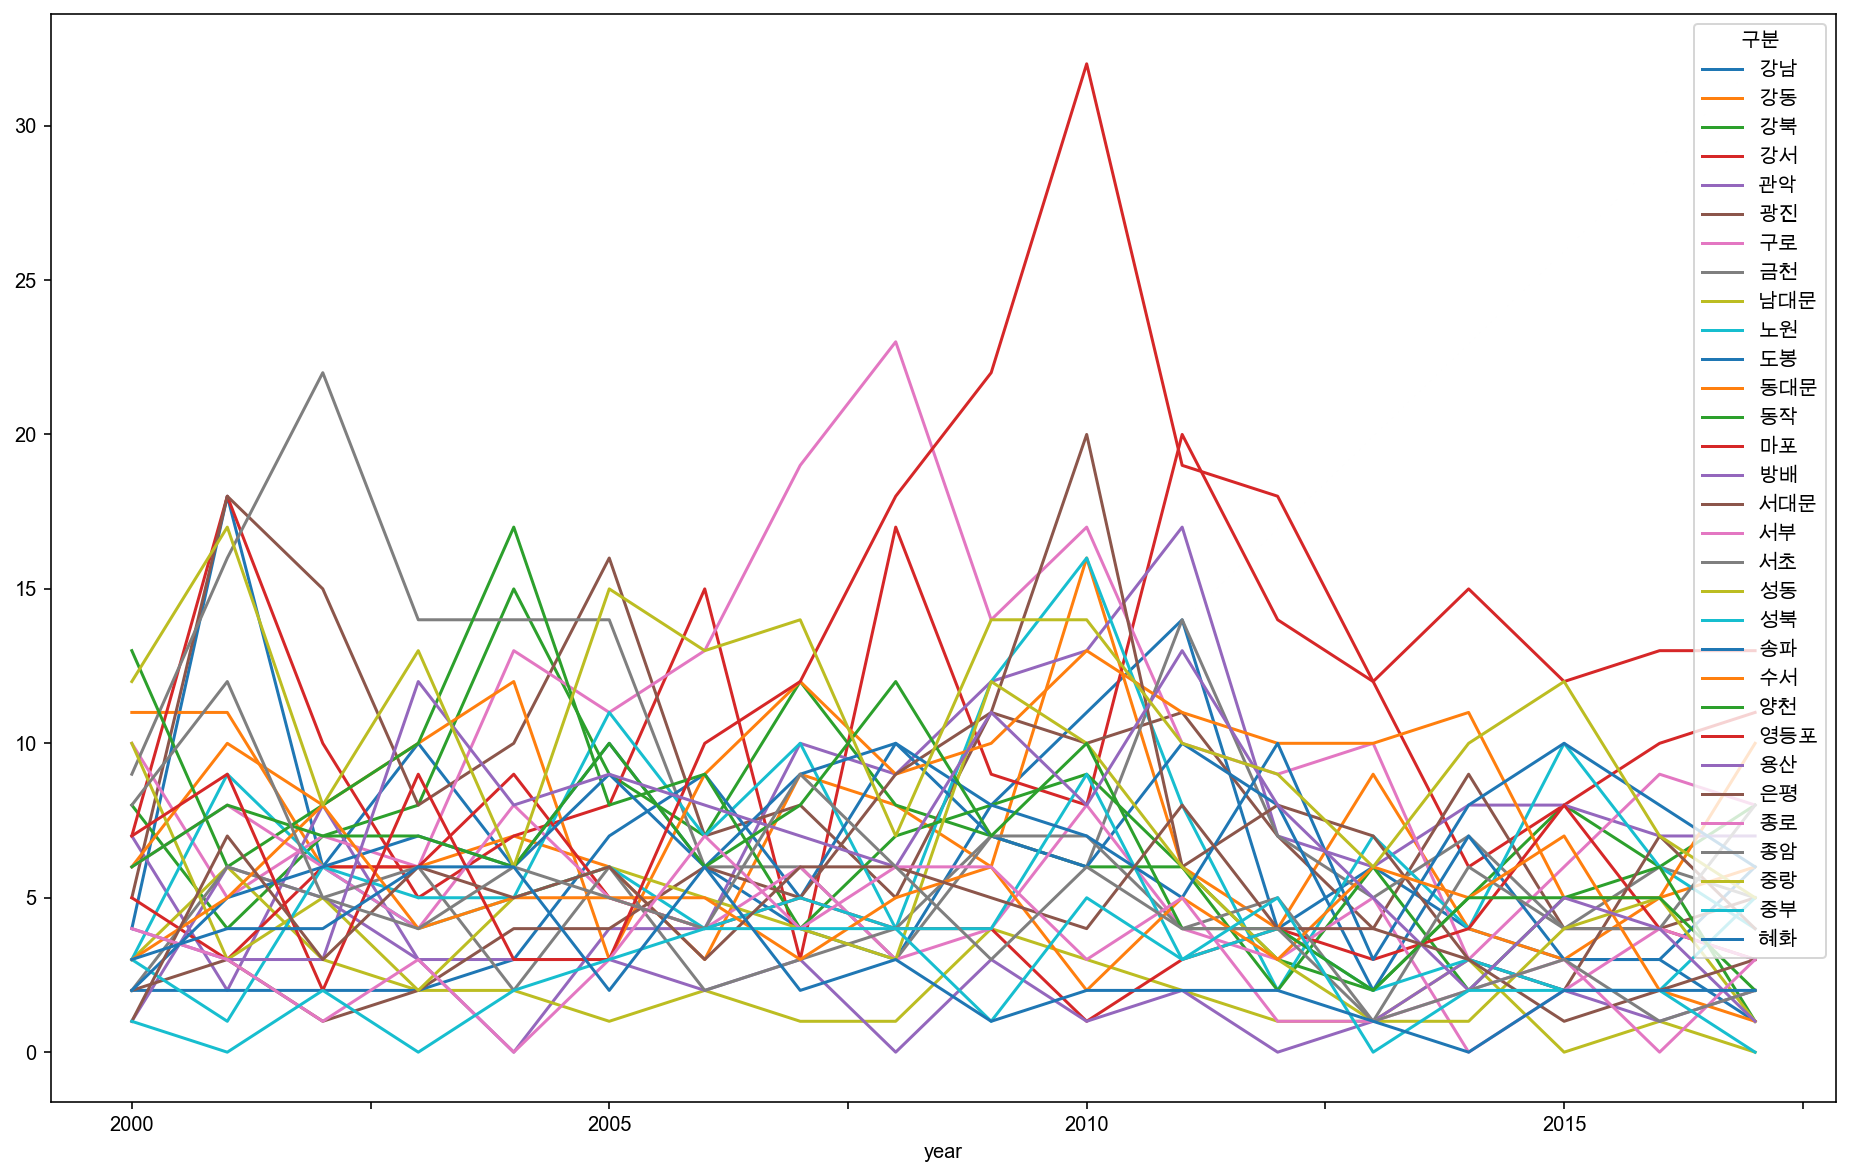

In [91]:
crime_total_murder.plot(figsize=(16,10))
plt.show()

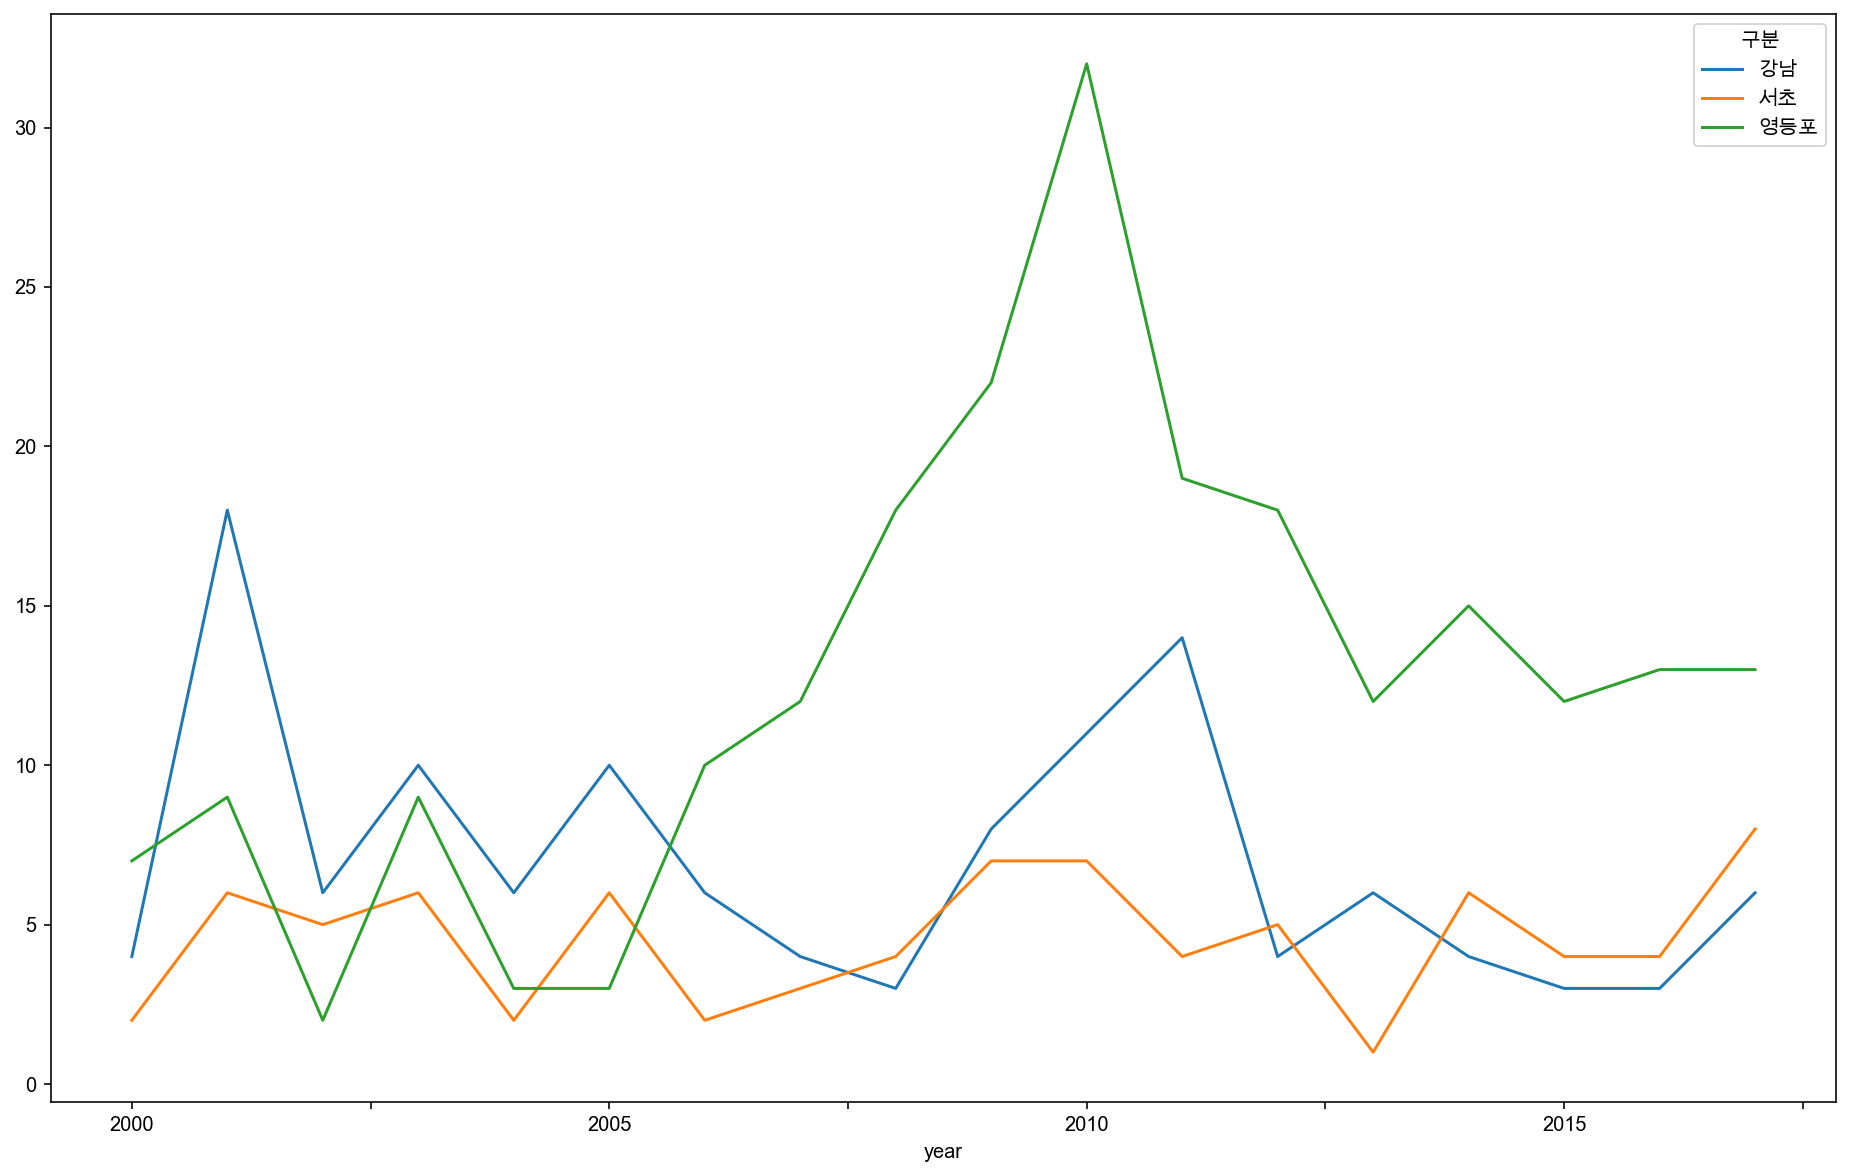

In [92]:
crime_total_murder[["강남", "서초", "영등포"]].plot(figsize=(16,10))
plt.show()

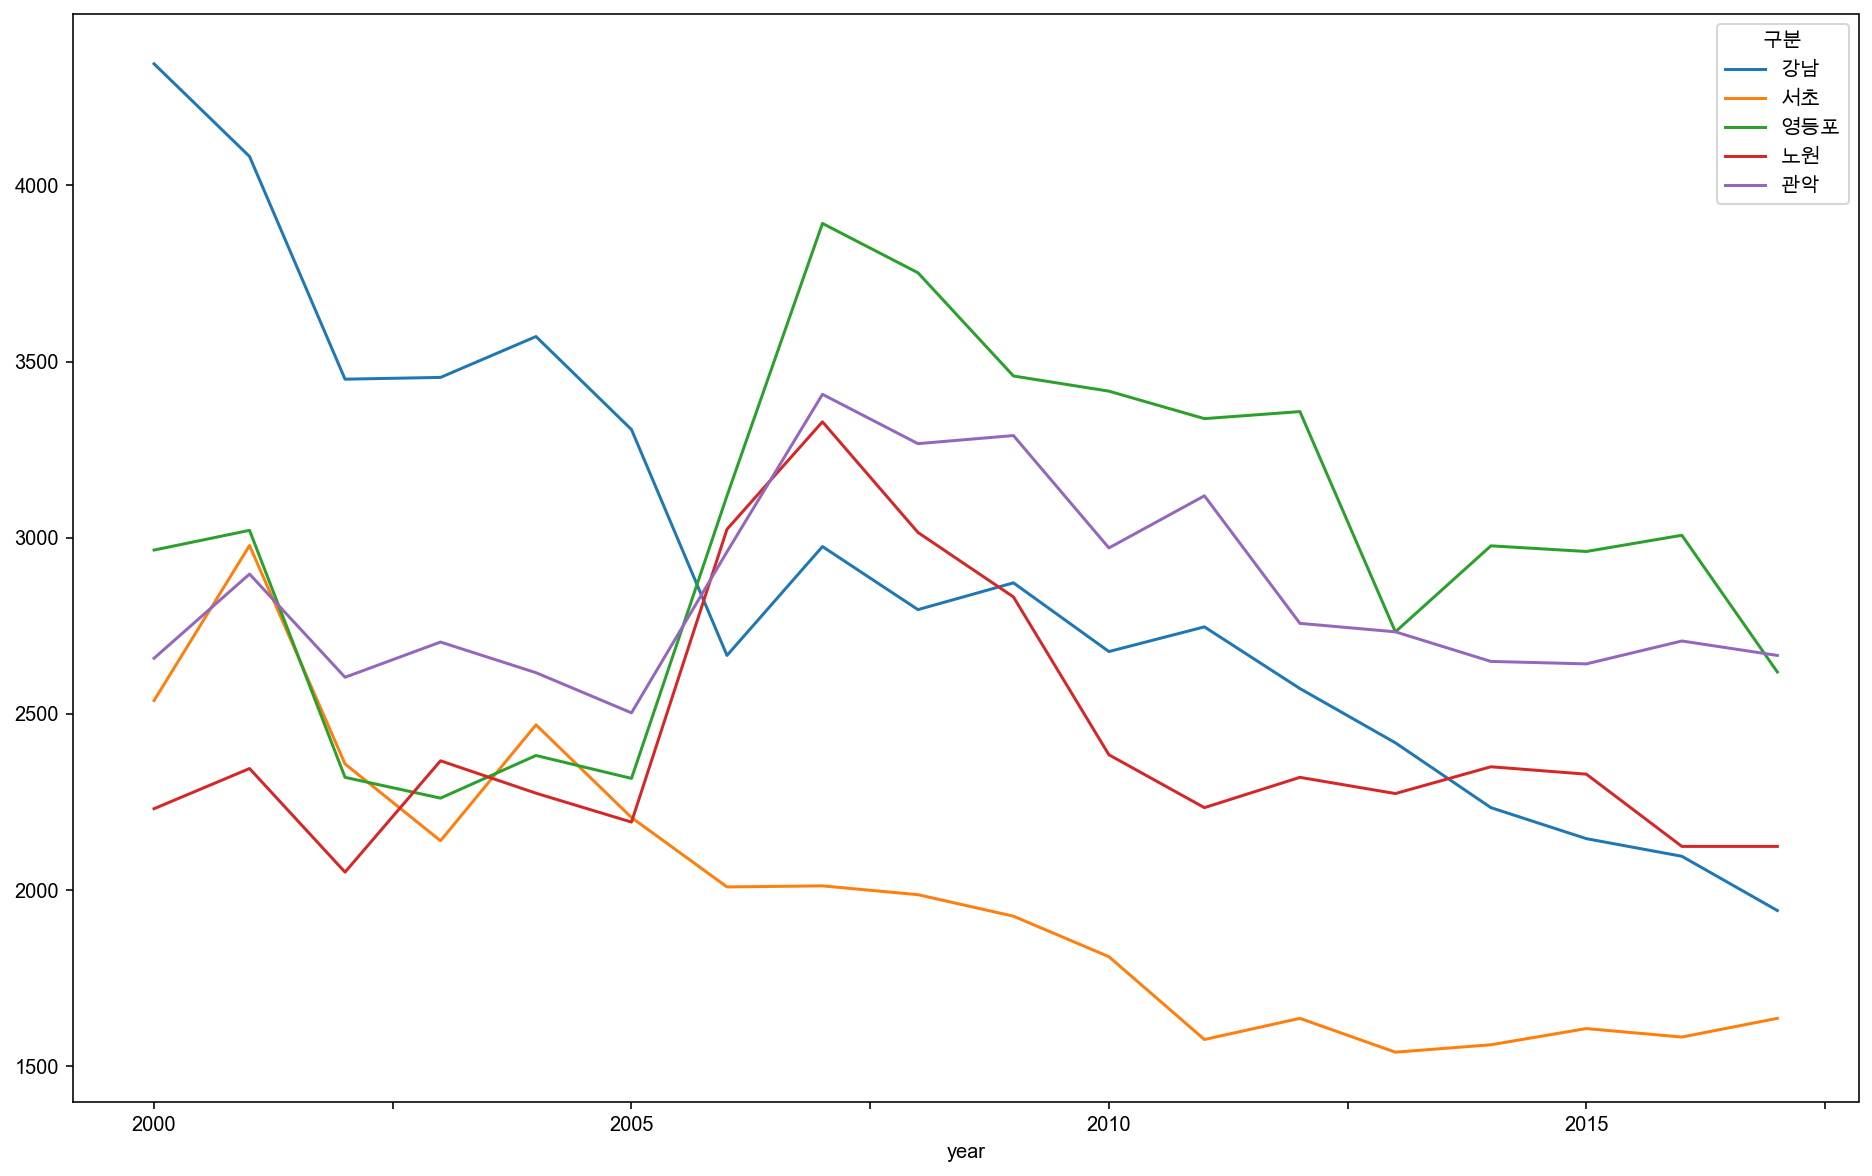

In [93]:
crime_total_violence = crime_total.pivot("year", "구분", "폭력")
crime_total_violence[["강남", "서초", "영등포", "노원", "관악"]].plot(figsize=(16,10))
plt.show()

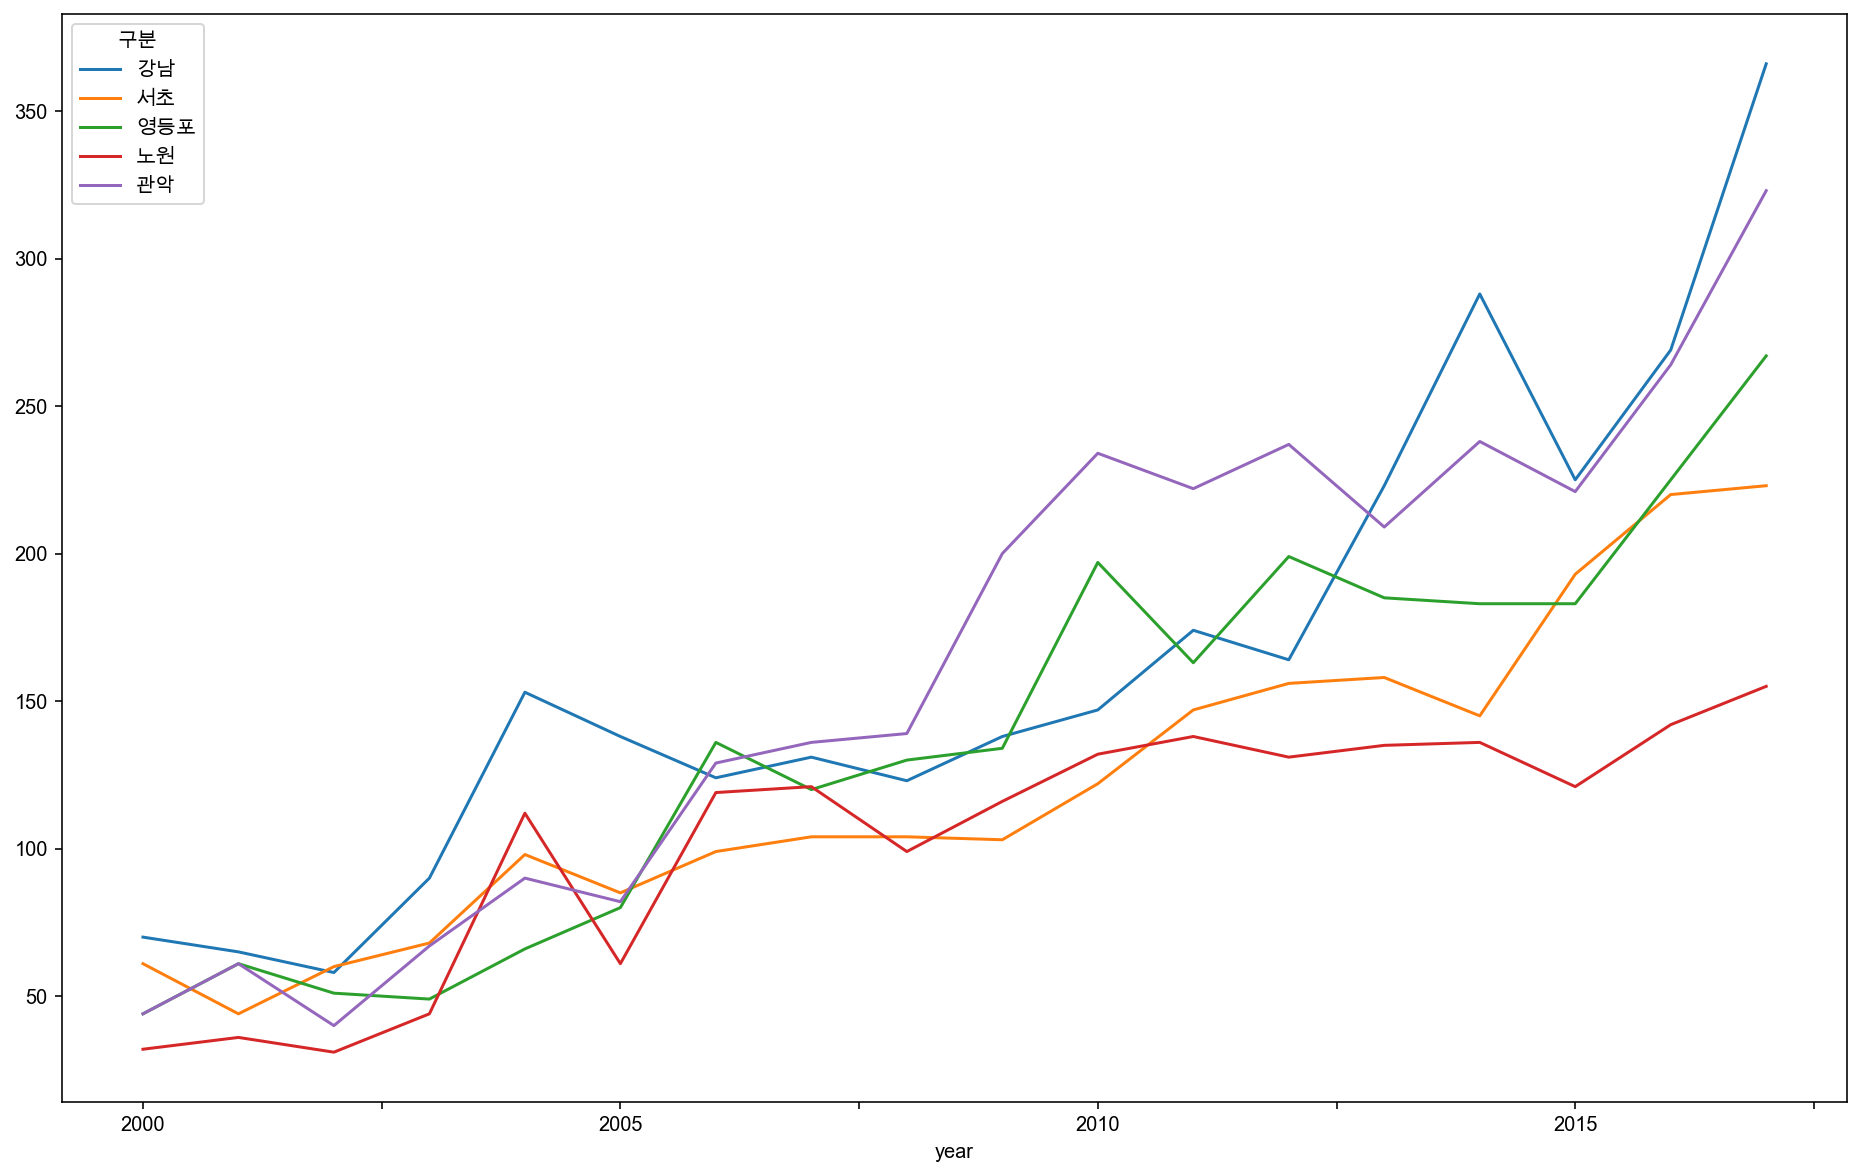

In [94]:
crime_total_sexual = crime_total.pivot("year", "구분", "강간")
crime_total_sexual[["강남", "서초", "영등포", "노원", "관악"]].plot(figsize=(16, 10))
plt.show()